In [146]:
""" 
3/22/23 - modualted by strokes, visual, reward, etc?
Extract snippets aligned to each event (e.g,, one for each trial and each stroke)
Then compute R2 for that.

TODO:
-

"""

' \n3/22/23 - modualted by strokes, visual, reward, etc?\nExtract snippets aligned to each event (e.g,, one for each trial and each stroke)\nThen compute R2 for that.\n\nTODO:\n'

##### Load neural and beh data (pending: cam)


In [1]:
from neuralmonkey.classes.session import Session
import matplotlib.pyplot as plt
from neuralmonkey.scripts.load_and_save_locally import load_and_preprocess_single_session
import neuralmonkey.utils.monkeylogic as mkl
from neuralmonkey.classes.session import load_session_helper, load_mult_session_helper
import os

##### LOAD DATA

In [2]:

### RULES
# PREFIX_SAVE = "rules"
# DATE = "220816"
# animal = "Pancho"
# dataset_beh_expt = None

# PREFIX_SAVE = "rules"
# DATE = "220815"
# animal = "Pancho"
# dataset_beh_expt = None

# PREFIX_SAVE = "rules"
# DATE = "220827"
# animal = "Pancho"
# dataset_beh_expt = None

# good
PREFIX_SAVE_BASE = "rules"
DATE = "221020"
dataset_beh_expt = None
animal = "Pancho"

# PREFIX_SAVE = "rules"
# DATE = "221125"
# dataset_beh_expt = None
# animal = "Pancho"

# good, but not many trials with "same beh"
# DATE = "221031"
# dataset_beh_expt = "dirshapecolor1h"
# animal = "Pancho"

# (no same beh)
# DATE = "221107"
# dataset_beh_expt = "dirfullvar1b"
# animal = "Pancho"


### SINGLE PRIMS
# DATE = "220715"
# dataset_beh_expt = "priminvar3"
# animal = "Pancho"

# DATE = "220716"
# dataset_beh_expt = "priminvar3"
# animal = "Pancho"

# DATE = "220717"
# dataset_beh_expt = "priminvar3"
# animal = "Pancho"

# -- motor kinematics (controlling for position of first touch)
# PREFIX_SAVE = "primsingle"
# DATE = "220719" 
# dataset_beh_expt = None
# animal = "Pancho"

##### mult prims in grid
# PREFIX_SAVE = "sequence"
# DATE = "221107"
# dataset_beh_expt = "dirfullvar1b"
# animal = "Pancho"


##### Load session by hand, if debugging beh-neural mappingm

In [ ]:
from neuralmonkey.utils.monkeylogic import session_map_from_rec_to_ml2_ntrials_mapping

session_map_from_rec_to_ml2_ntrials_mapping(animal, DATE, 0)

beh_expt_list = [x[1] for x in sessions[2][DATE]]
beh_sess_list = [x[0] for x in sessions[2][DATE]]
beh_trial_map_list = [(1, 0), (1, 45)]
SN = Session(DATE, beh_expt_list, beh_sess_list, beh_trial_map_list,
       expt = "Pancho-220719-155517", animal=animal)

##### Load data 

Searching using this string:
/mnt/hopfield_data01/ltian/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/mnt/hopfield_data01/ltian/recordings/Pancho/221020/Pancho-221020-133436
---
/mnt/hopfield_data01/ltian/recordings/Pancho/221020/Pancho-221020-161238
session:  0
Searching using this string:
/mnt/hopfield_data01/ltian/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/mnt/hopfield_data01/ltian/recordings/Pancho/221020/Pancho-221020-133436
---
/mnt/hopfield_data01/ltian/recordings/Pancho/221020/Pancho-221020-161238
1
2
3
Beh Sessions hand netered (mapping: rec sess --> beh sess):  [2, 3]
taking this beh session: 2
Loading these beh expts: ['dirshapecolor1b']
Loading these beh sessions: [2]
Loading this neural session: 0
Searching using this string:
/mnt/hopfield_data01/ltian/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/mnt/hopfield_data01/ltian/recordings/Pancho/221020/Pancho-221020-133436
---
/mnt/hopfield_data01/ltian/recordings/Pancho/221020

** Loading tank data from local (previusly cached)
== Done
== Loading ml2 behavior
-- loaded presaved data: /gorilla1/animals/Pancho/221020/221020_133256_dirshapecolor1b_Pancho_2.pkl
== Done
-- This is the lag for optimal xcorr of tdt and ml2 trial durations (+ means should look further back into beh trials):
0
-- This is the variation in (tdt - ml2) durations across trials. shodl be clsoe to 0
3.041948539659759e-05
GREAT!! mapping is correct. Doing nothing
== Loading spike times
** Loading spike data from local (previusly cached)
== Done
== Trying to load events data
Loading this events (pd) locally to:  /gorilla1/neural_preprocess/recordings/Pancho/221020/Pancho-221020-133436/events_photodiode.pkl
== Done
Generated self._MapperTrialcode2TrialToTrial!
Saved all bad site to self.SitesErrorSpikeDat
** Loading datall from local (previusly cached)
Done loading!
DOING: datall_cleanup_add_things
Generated self.DatAllDf
** Loading _MapperSiteTrial2DatAllInd from local (previusly cached)
Extr

** Loading tank data from local (previusly cached)
== Done
== Loading ml2 behavior
-- loaded presaved data: /gorilla1/animals/Pancho/221020/221020_161105_dirshapecolor1b_Pancho_3.pkl
== Done
-- This is the lag for optimal xcorr of tdt and ml2 trial durations (+ means should look further back into beh trials):
0
-- This is the variation in (tdt - ml2) durations across trials. shodl be clsoe to 0
3.1487212298828553e-05
GREAT!! mapping is correct. Doing nothing
== Loading spike times
** Loading spike data from local (previusly cached)
== Done
== Trying to load events data
Loading this events (pd) locally to:  /gorilla1/neural_preprocess/recordings/Pancho/221020/Pancho-221020-161238/events_photodiode.pkl
== Done
Generated self._MapperTrialcode2TrialToTrial!
Saved all bad site to self.SitesErrorSpikeDat
** Loading datall from local (previusly cached)
Done loading!
DOING: datall_cleanup_add_things
Generated self.DatAllDf
** Loading _MapperSiteTrial2DatAllInd from local (previusly cached)
Ext

stored in self.Dat[BehClass]
0
200
400
600
Running D.behclass_tokens_extract_datsegs
0
200
400
600
Appended self.Dat[superv_SEQUENCE_SUP]
Appended self.Dat[superv_COLOR_ON]
Appended self.Dat[superv_COLOR_METHOD]
Appended self.Dat[superv_GUIDEDYN_ON]
appended col to self.Dat:
supervision_stage_concise
probe task in epoch:  neuralbiasdir-30-1-750376 L
probe task in epoch:  neuralbiasdir-30-1-750376 llV1
probe task in epoch:  neuralbiasdir-30-24-498080 L
probe task in epoch:  neuralbiasdir-30-24-498080 llV1
probe task in epoch:  neuralbiasdir-31-10-293017 L
probe task in epoch:  neuralbiasdir-31-10-293017 llV1
probe task in epoch:  neuralbiasdir-31-3-322193 L
probe task in epoch:  neuralbiasdir-31-3-322193 llV1
probe task in epoch:  neuralbiasdir-31-4-017595 llV1
probe task in epoch:  neuralbiasdir-31-4-017595 L
probe task in epoch:  neuralbiasdir-31-6-560297 llV1
probe task in epoch:  neuralbiasdir-31-6-560297 L
[taskgroup_reassign_by_mapper], reassigned values in column: taskgroup
[task

Appended column: los_info
Appended self.Dat[superv_SEQUENCE_SUP]
Appended self.Dat[superv_SEQUENCE_ALPHA]
Appended self.Dat[superv_COLOR_ON]
Appended self.Dat[superv_COLOR_METHOD]
Appended self.Dat[superv_GUIDEDYN_ON]
Appended self.Dat[superv_VISUALFB_METH]
appended col to self.Dat:
supervision_stage_new
stored in self.Dat[BehClass]
0
200
400
600
Running D.behclass_tokens_extract_datsegs
0
200
400
600
Appended self.Dat[superv_SEQUENCE_SUP]
Appended self.Dat[superv_COLOR_ON]
Appended self.Dat[superv_COLOR_METHOD]
Appended self.Dat[superv_GUIDEDYN_ON]
appended col to self.Dat:
supervision_stage_concise
probe task in epoch:  neuralbiasdir-30-1-750376 L
probe task in epoch:  neuralbiasdir-30-1-750376 llV1
probe task in epoch:  neuralbiasdir-30-24-498080 L
probe task in epoch:  neuralbiasdir-30-24-498080 llV1
probe task in epoch:  neuralbiasdir-31-10-293017 L
probe task in epoch:  neuralbiasdir-31-10-293017 llV1
probe task in epoch:  neuralbiasdir-31-3-322193 L
probe task in epoch:  neuralb

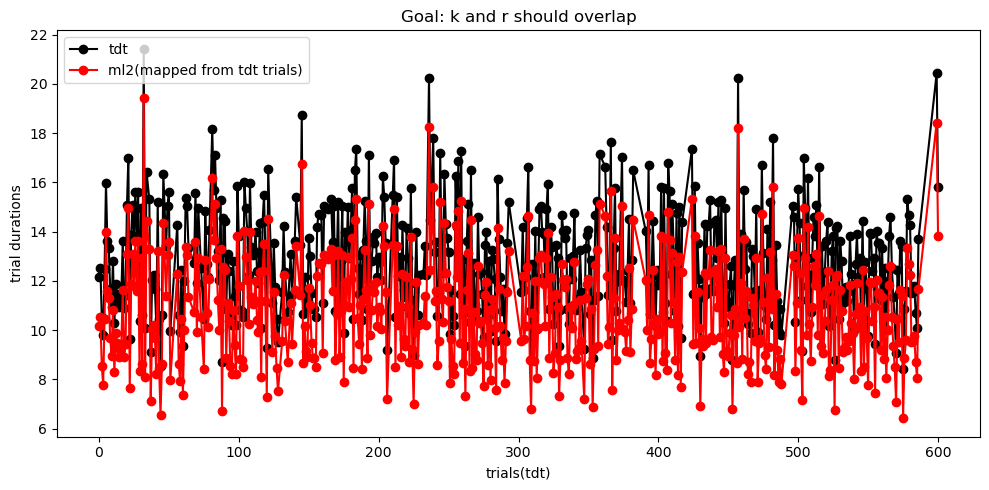

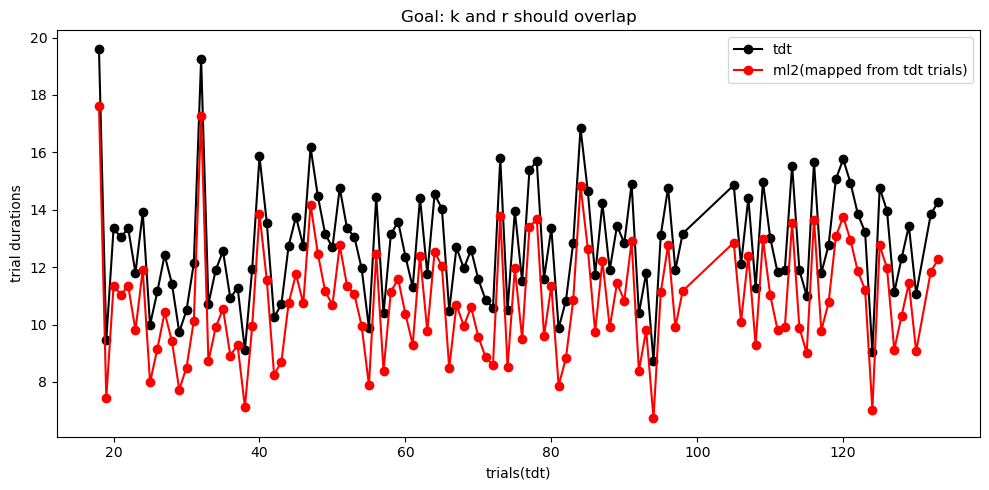

In [3]:
# %matplotlib inline
# to help debug if times are misaligned.

# MS = load_mult_session_helper(DATE, animal, dataset_beh_expt)
animal = "Pancho"
MS = load_mult_session_helper(DATE, animal)
    
# [OPTIONAL] import dataset
# for sn in MS.SessionsList:
#     sn.datasetbeh_load_helper(dataset_beh_expt)
for sn in MS.SessionsList:
    sn.datasetbeh_load_helper(dataset_beh_expt)




#### Print summaries of datasets

In [ ]:
# print summary:
for i, sn in enumerate(MS.SessionsList):
    print("\n====== SESSION NUM: ", i)
    sn.sitegetter_print_summary_nunits_by_region()


### EVENT MODULATION

In [124]:
session = 0

SAVEDIR = f"/gorilla1/analyses/recordings/main/events_modulation/{animal}-{DATE}-sess_{session}"
os.makedirs(SAVEDIR, exist_ok=True)


##### Extract single snippet for each stroke

In [59]:
from neuralmonkey.analyses.event_temporal_modulation import preprocess_and_plot, plot_overview

In [ ]:
# DEBUGGIN


SP_trial, SP_stroke, Mscal, df_modtime = preprocess_and_plot(MS, SAVEDIR, session=session, DEBUG=True)


In [ ]:
# GOOD
for session in range(len(MS.SessionsList)):
    
    SAVEDIR = f"/gorilla1/analyses/recordings/main/events_modulation/{animal}-{DATE}-sess_{session}"
    os.makedirs(SAVEDIR, exist_ok=True)
    
    SP_trial, SP_stroke, Mscal, df_modtime = preprocess_and_plot(MS, SAVEDIR, session=session, DEBUG=True)


In [ ]:
# DEBUGGING
if False:
    plot_overview(df_modtime, SAVEDIR)


### LOAD DIRECTLY the results of above, and make plots

In [ ]:
import os
import pickle

SAVEDIR = "/gorilla1/analyses/recordings/main/events_modulation/Pancho-221020-sess_0/RELOADED_DF_MODTIME"
path = "/gorilla1/analyses/recordings/main/events_modulation/Pancho-221020-sess_0/df_modtime.pkl"

# SAVEDIR = "/gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/RELOADED_DF_MODTIME"
# path = "/gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/df_modtime.pkl"

os.makedirs(SAVEDIR, exist_ok=True)

with open(path, "rb") as f:
    df_modtime = pickle.load(f)

from neuralmonkey.analyses.event_temporal_modulation import plot_overview
plot_overview(df_modtime, SAVEDIR)

In [ ]:
#### Load MScal
path = "/gorilla1/analyses/recordings/main/events_modulation/Pancho-221020-sess_0/Mscal.pkl"
with open(path, "rb") as f:
    Mscal = pickle.load(f)


In [ ]:
import numpy as np
event_stroke_all_tuple = ("stroke-last", "stroke-first", "stroke-both_fl", "stroke-middle")
list_event_get = Mscal.ListEventsUniqname + [event_stroke_all_tuple]
list_event_get = [ev for ev in list_event_get if not ev=="stroke-both_fl"]
res = Mscal.modulationbytime_calc_this(1, list_event_get)

x = [r["r2_time"] for r in res]

# plt.figure()
# plt.plot(x)
print("MEAN r2:", np.mean(x))
for xx in x:
    print(xx)

In [ ]:
list_site_good = Mscal.Data["chan"].unique().tolist()

In [ ]:
res

In [ ]:
res

In [ ]:
res_all = []
event_stroke_all = ("stroke-last", "stroke-first", "stroke-middle")
list_event_get = Mscal.ListEventsUniqname + [event_stroke_all]

for site in list_site_good:

    if site%20==0:
        print(site)

    # 1) Compute matrix for trial-level data
    res_this = Mscal.modulationbytime_calc_this(site, list_event=list_event_get)
    res_all.extend(res_this)

df_modtime = pd.DataFrame(res_all)
df_modtime["event_var_level"] = df_modtime["event"]



##### Combine multiple days (each unit is independent)

In [148]:
import os
import pickle
from neuralmonkey.analyses.event_temporal_modulation import preprocess_and_plot, plot_overview

Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220616-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic/brainschem-kernel-kernel_score-.pdf


/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220616-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220616-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220616-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220616-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('07_reward_all

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220616-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220616-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220616-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220616-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('07_reward_all', '

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220630-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220630-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220630-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220630-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('07_reward_all

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220630-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220630-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220630-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220630-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('07_reward_all', '

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220624-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220624-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220624-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220624-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('07_reward_all

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220624-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220624-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220624-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220624-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('07_reward_all', '

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220714-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220714-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220714-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220714-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('07_reward_all

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220714-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220714-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220714-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220714-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('07_reward_all', '

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220827-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220827-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220827-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220827-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('07_reward_all

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220827-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220827-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220827-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-220827-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('07_reward_all', '

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221020-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221020-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221020-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221020-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('07_reward_all

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221020-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221020-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221020-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221020-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('07_reward_all', '

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('07_reward_all

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/RELOADED_DF_MODTIME/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('07_reward_all', '

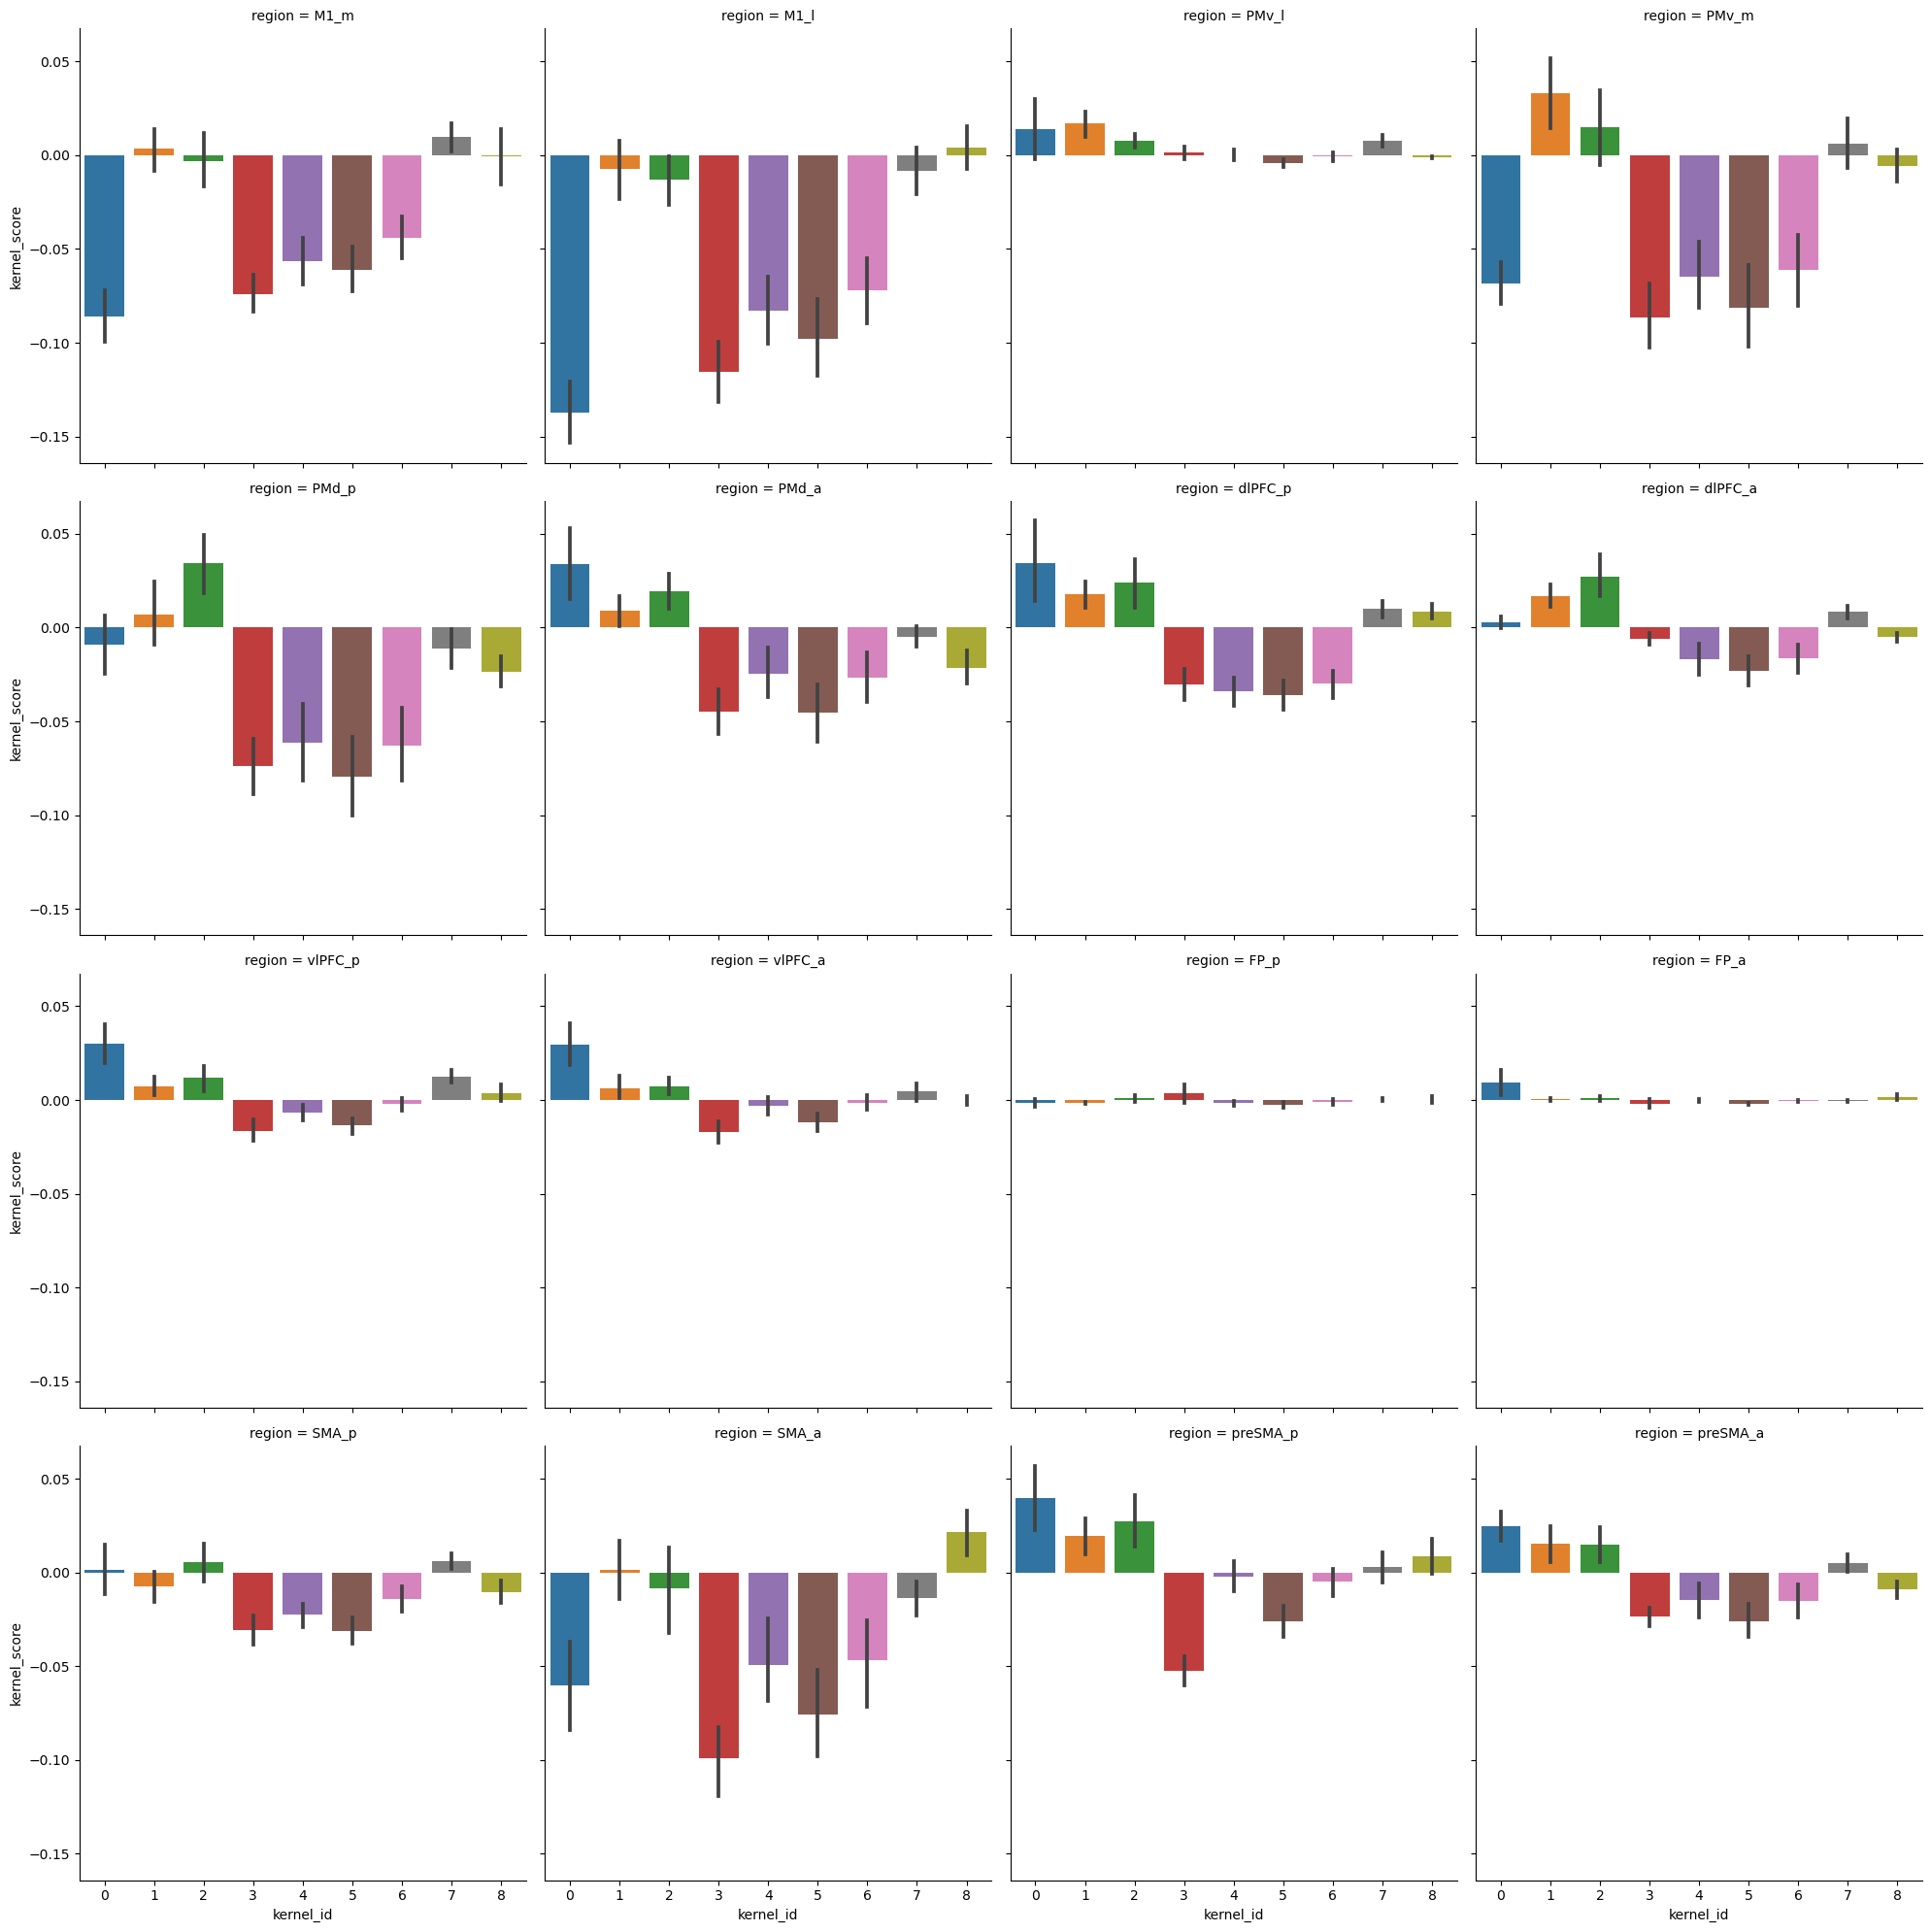

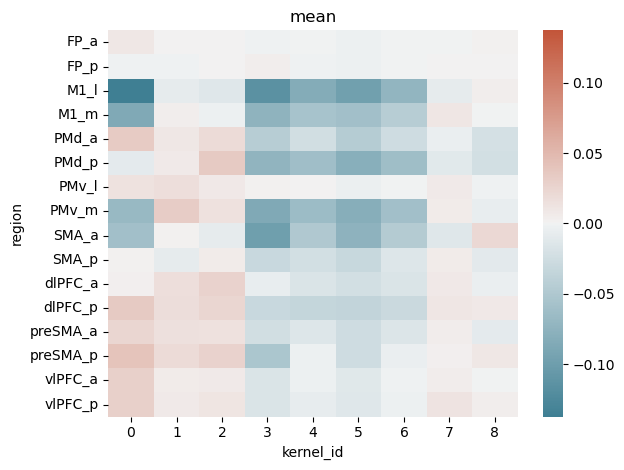

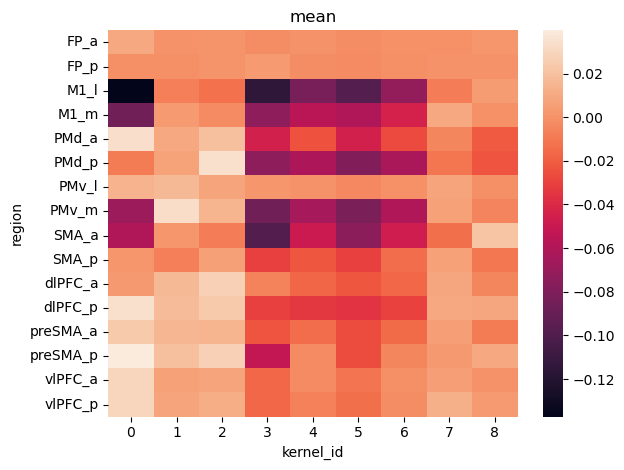

In [153]:
# do_recompute = True
# list_date_sess = [
#     (220616, 0),
#     (220630, 0),
#     (221020, 0),
# ]

do_recompute = True
list_date_sess = [
    (220616, 0),
    (220630, 0),
    (220624, 0),
    (220714, 0),
    (220827, 0),
    (221020, 0), 
    (221107, 0)
]

list_df_modtime = []
for date, sess in list_date_sess:
    path = f"/gorilla1/analyses/recordings/main/events_modulation/Pancho-{date}-sess_{sess}/df_modtime.pkl"
    with open(path, "rb") as f:
        df_modtime = pickle.load(f)
    
    # RECOMPUTE for this day?
    if do_recompute:
        SAVEDIRTHIS = f"/gorilla1/analyses/recordings/main/events_modulation/Pancho-{date}-sess_{sess}/RELOADED_DF_MODTIME"
        os.makedirs(SAVEDIRTHIS, exist_ok=True)
        plot_overview(df_modtime, SAVEDIRTHIS)

    # append the file
#     df_modtime["date_sess"] = (date, sess)
    df_modtime["date_sess"] = f"{date}-{sess}"
    
    # store
    list_df_modtime.append(df_modtime)

In [154]:
# concat
import pandas as pd
df_modtime_all = pd.concat(list_df_modtime).reset_index(drop=True)

# rename site so that is cross of site x session
from pythonlib.tools.pandastools import applyFunctionToAllRows
def F(x):
    return f"{x['date_sess']}-{x['site']}"
df_modtime_all = applyFunctionToAllRows(df_modtime_all, F, "site")

# remove site_region, so not get confused
df_modtime_all = df_modtime_all.drop("site_region", axis=1)
    

In [155]:
from pythonlib.tools.expttools import makeTimeStamp, writeDictToYaml
ts = makeTimeStamp()

In [156]:
# save combined data
sdir = f"/gorilla1/analyses/recordings/main/events_modulation/COMBINED/{ts}"
os.makedirs(sdir, exist_ok=True)

# save info
writeDictToYaml(list_date_sess, f"{sdir}/list_date_sess.txt")

Saving to:  /gorilla1/analyses/recordings/main/events_modulation/COMBINED/230323_191230/modulation/kernels-norm_by_rows_False/brain_schematic/brainschem-kernel-kernel_score-.pdf


/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/COMBINED/230323_191230/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/COMBINED/230323_191230/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/COMBINED/230323_191230/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/COMBINED/230323_191230/modulation/kernels-norm_by_rows_False/brain_schematic-kernel_('07_reward_all', '01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainsch

/gorilla1/code/neuralmonkey/neuralmonkey/neuralplots/brainschematic.py:218: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig_hist.savefig(path_hist)


Saving to:  /gorilla1/analyses/recordings/main/events_modulation/COMBINED/230323_191230/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/COMBINED/230323_191230/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('04_off_stroke_last', '00_fix_touch', '03_first_raise', 'stroke-first', 'stroke-middle')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/COMBINED/230323_191230/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('05_doneb', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-None-kernel_score-.pdf
Saving to:  /gorilla1/analyses/recordings/main/events_modulation/COMBINED/230323_191230/modulation/kernels-norm_by_rows_True/brain_schematic-kernel_('07_reward_all', '01_samp', '00_fix_touch', '03_first_raise', 'stroke-first')/brainschem-N

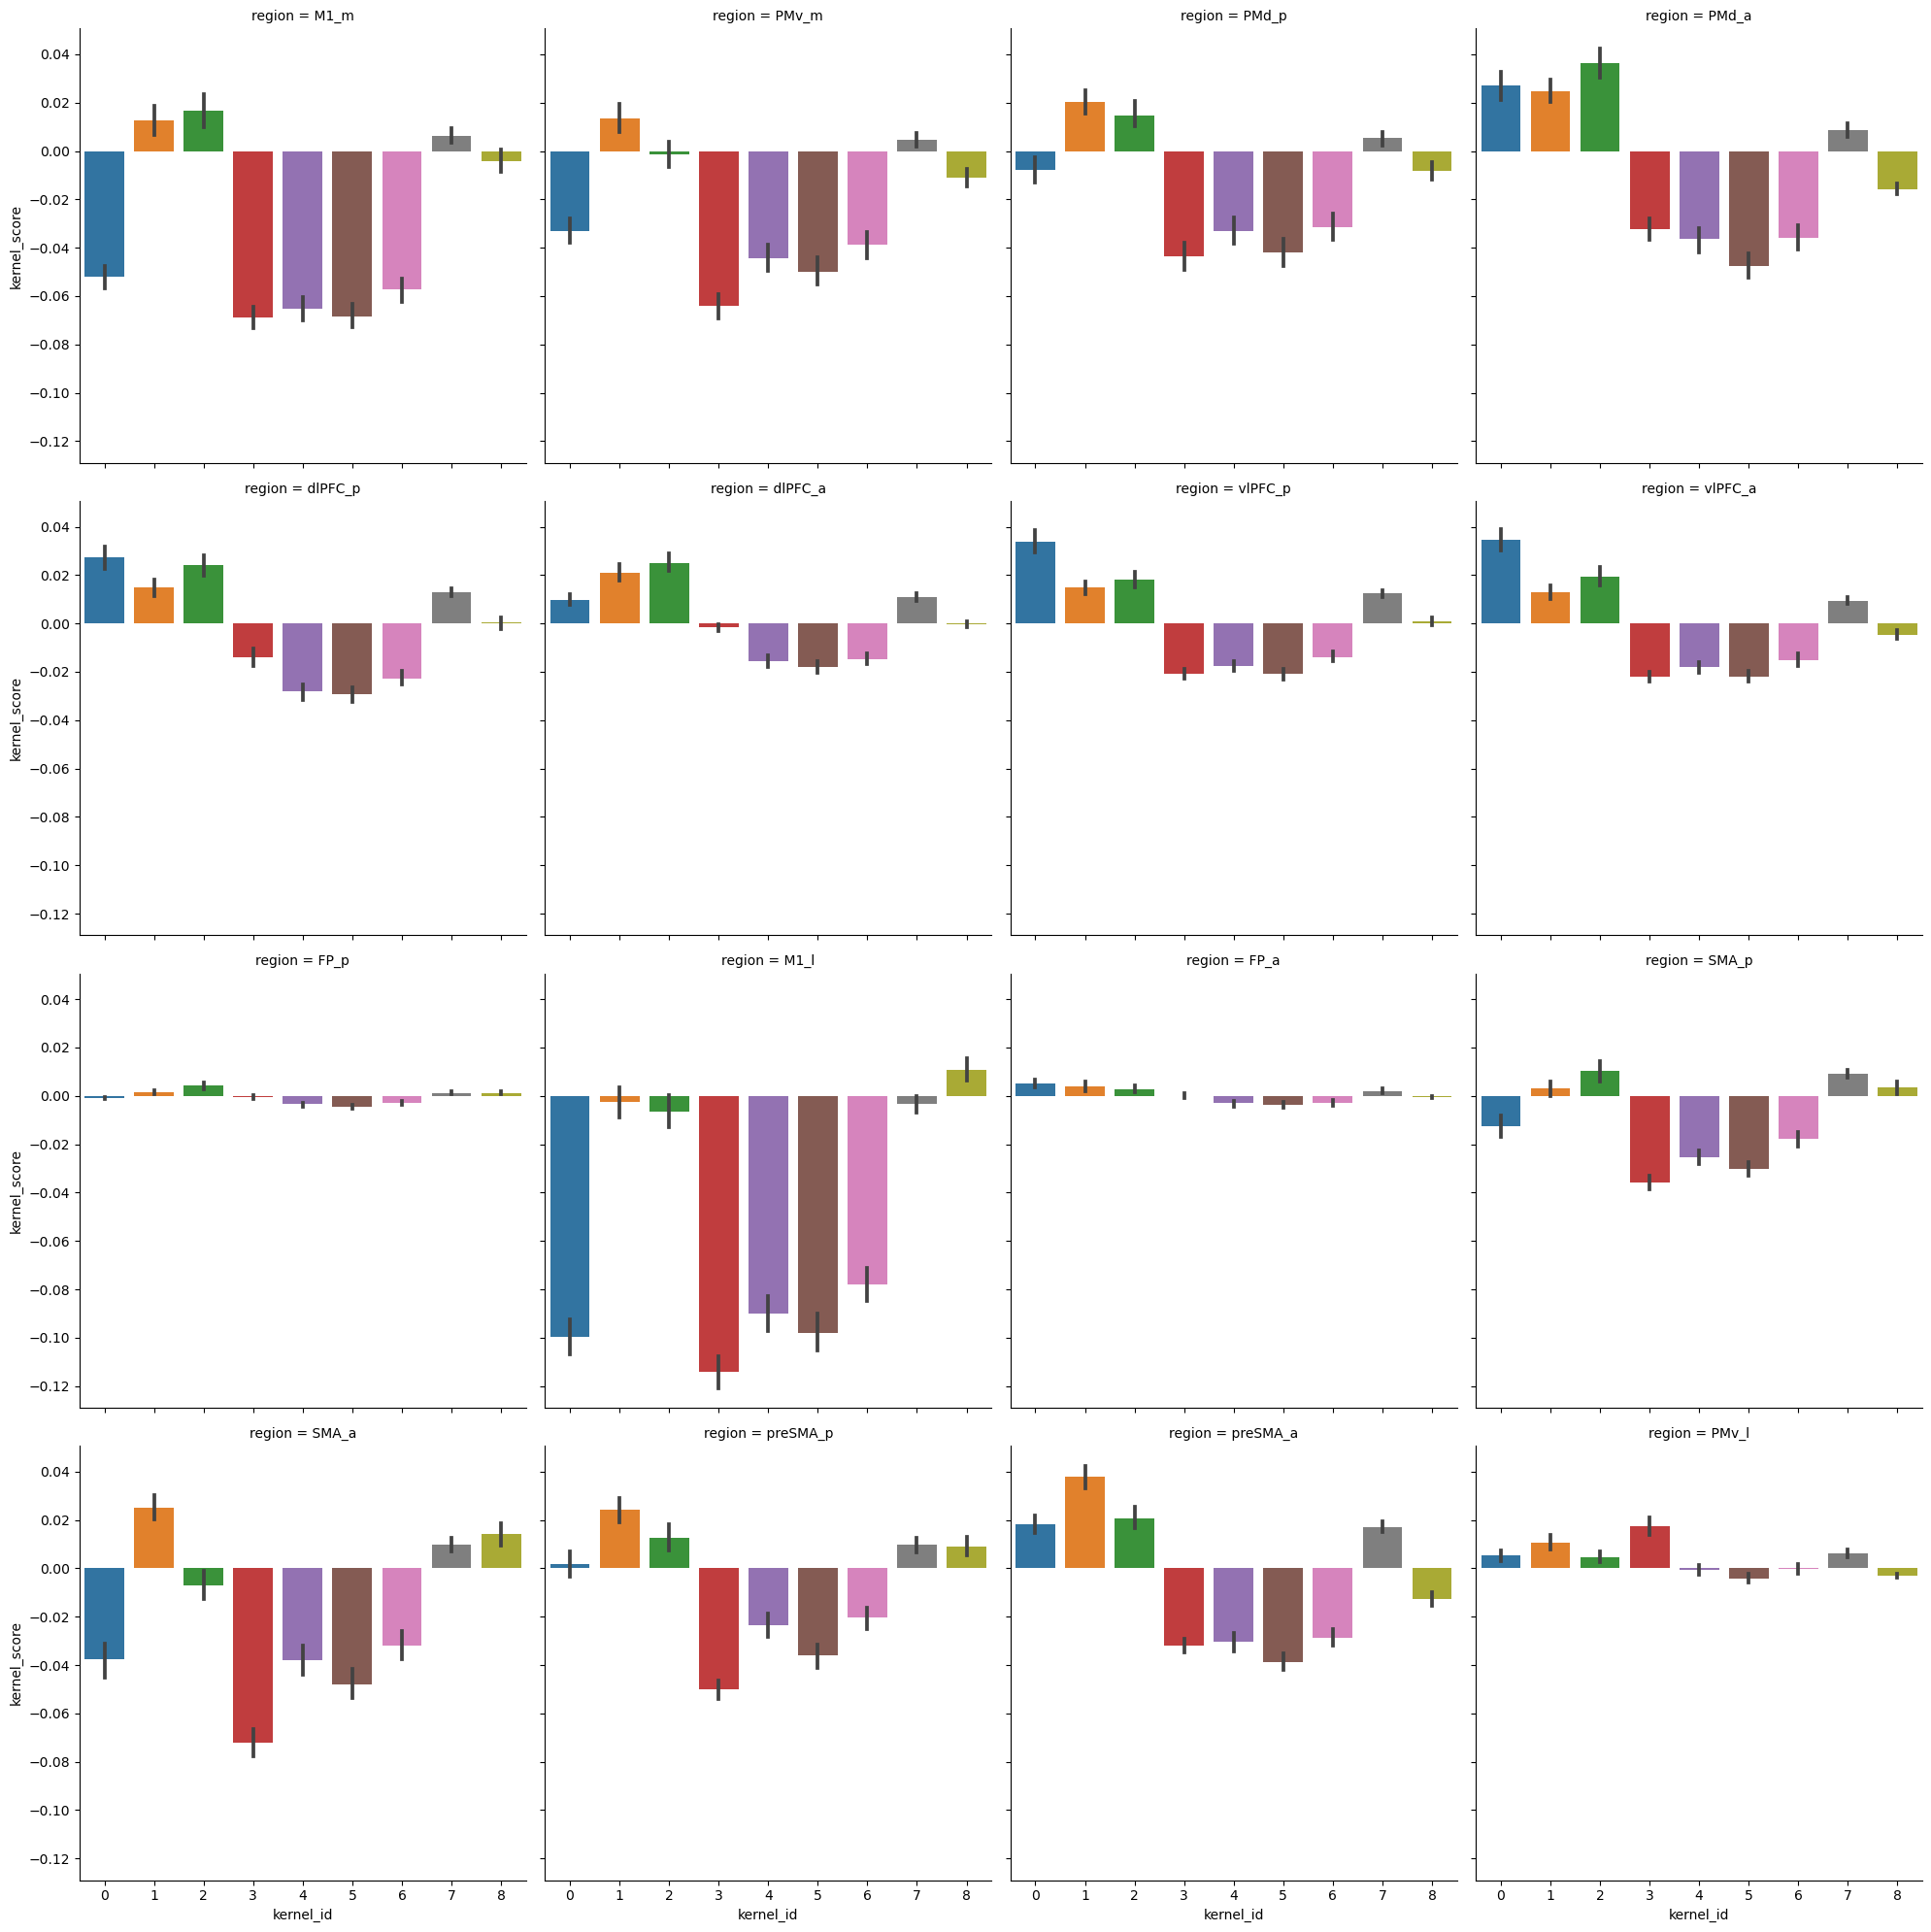

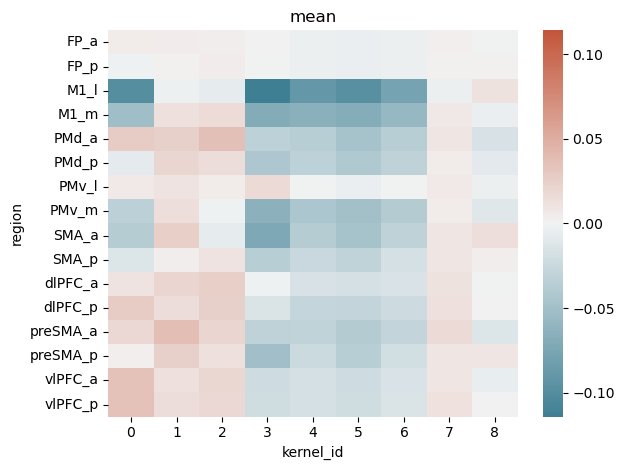

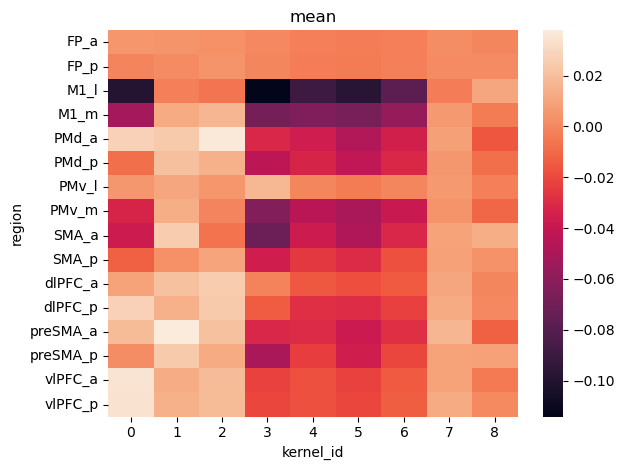

In [157]:
# Plot
plot_overview(df_modtime_all, sdir)

In [199]:
from neuralmonkey.analyses.event_temporal_modulation import kernel_compute, _kernel_compute_scores_pos_and_neg

df_kernels, df_modtime_wide, df_modtime_wide_normrowsubtr, dict_kernels = kernel_compute(df_modtime_all, normalize_by_row=False)



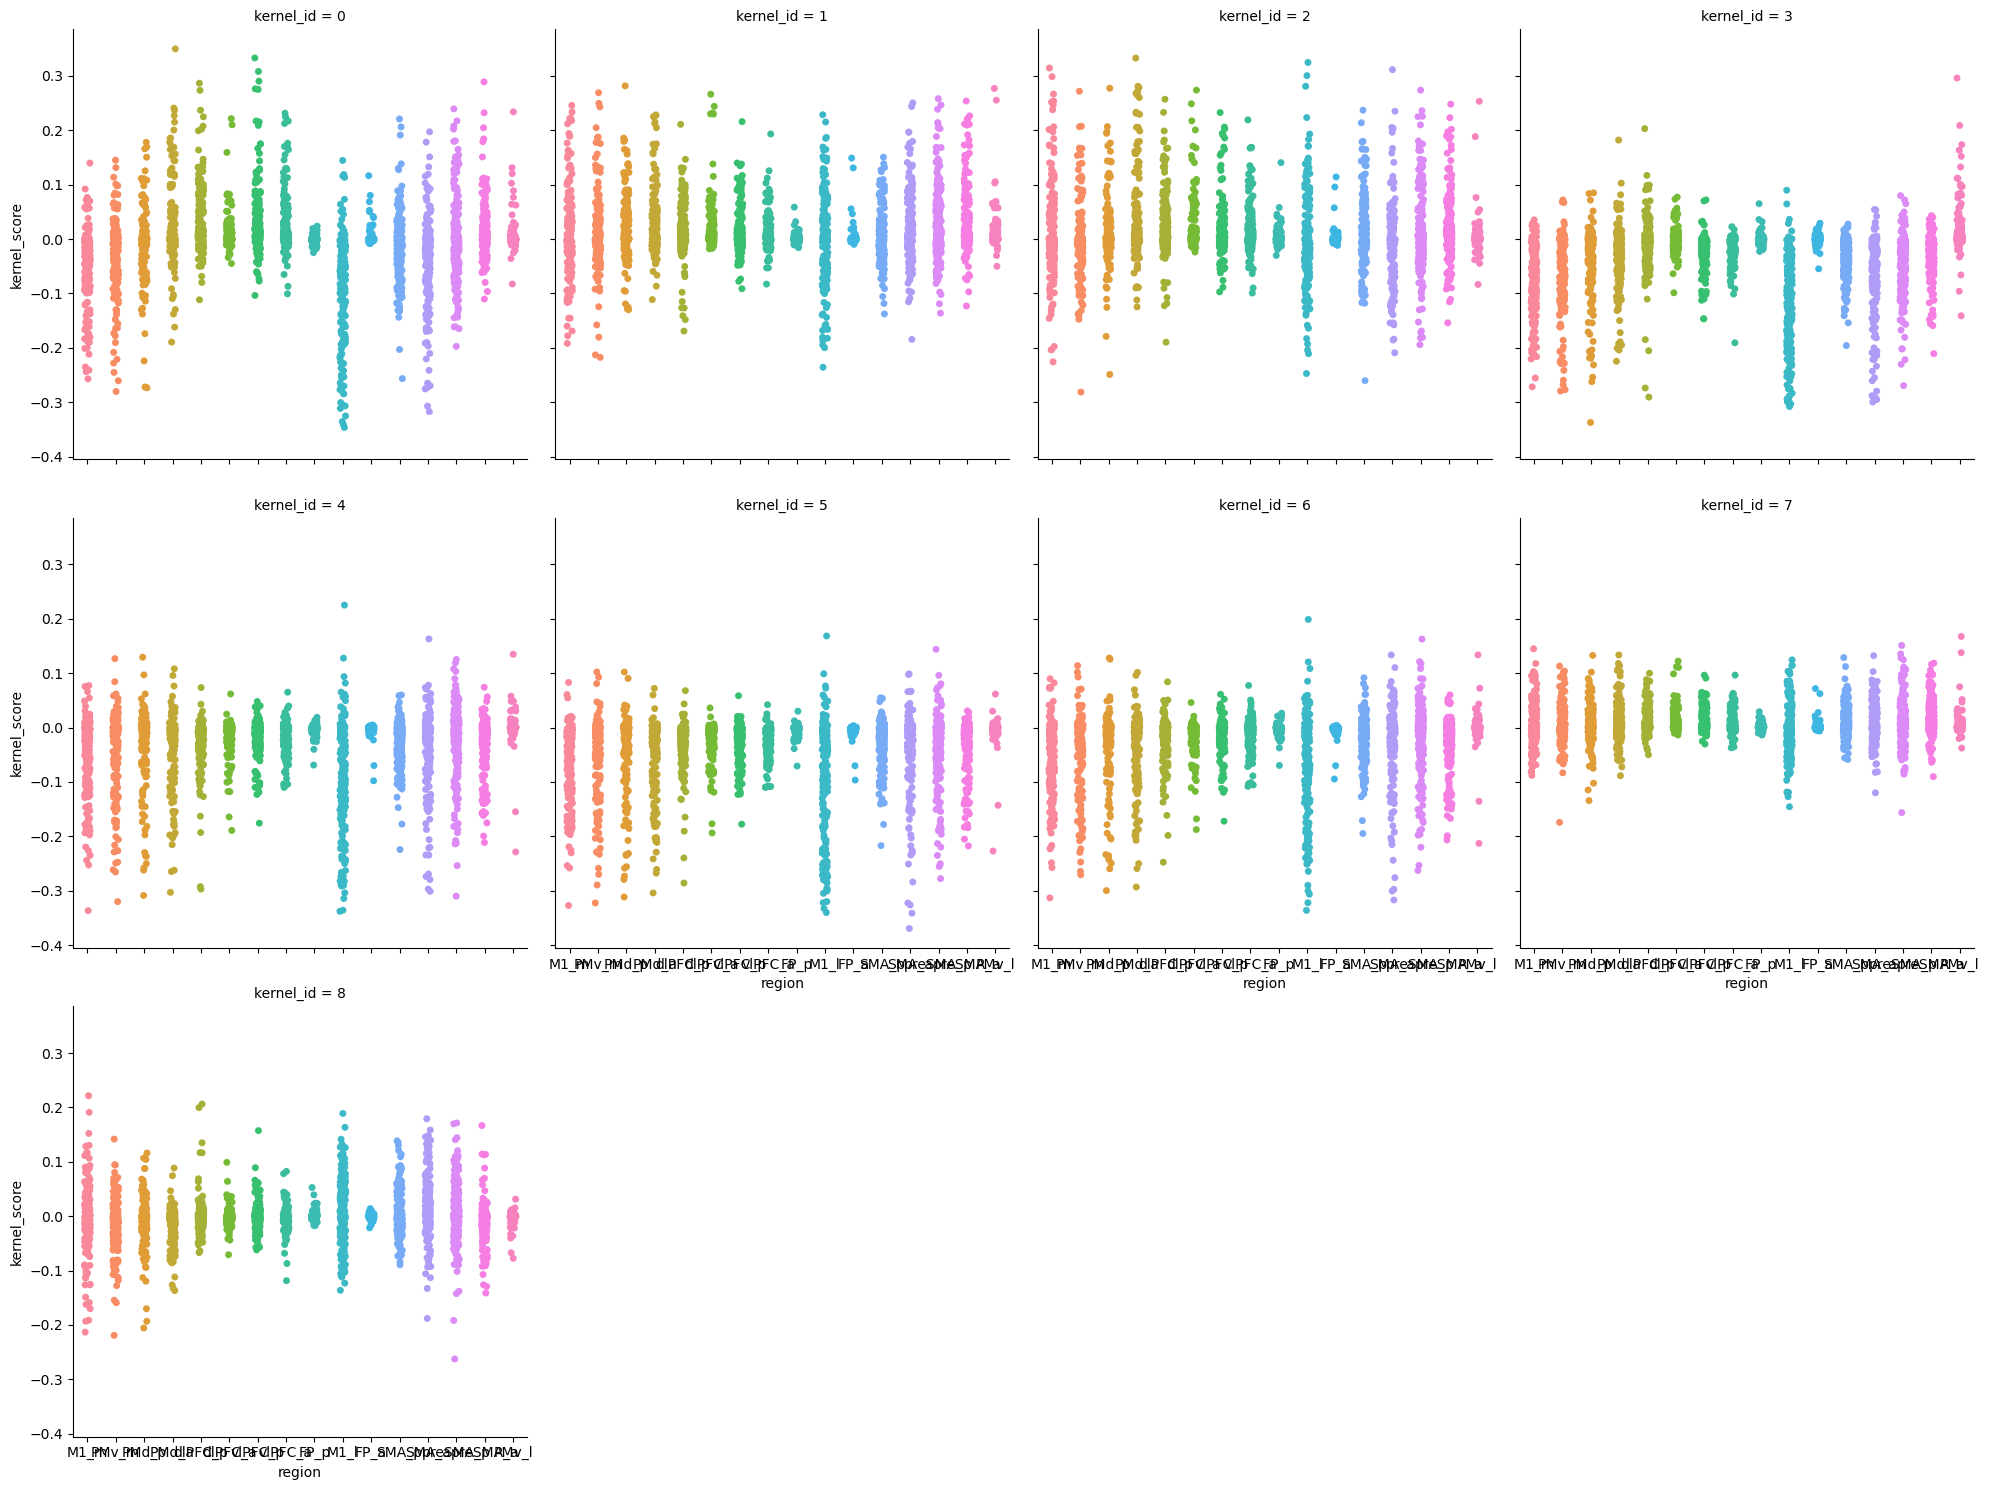

In [236]:
sns.catplot(data=df_kernels, x="region", y="kernel_score", col="kernel_id", col_wrap=4, )

In [200]:
for kernel, weights in dict_kernels.items():
    scores_pos, scores_neg = _kernel_compute_scores_pos_and_neg(df_modtime_wide, kernel, weights)
    

In [201]:
df_modtime_wide

,site,region,r2_time_minusmean-00_fix_touch,r2_time_minusmean-01_samp,r2_time_minusmean-02_go_cue,r2_time_minusmean-03_first_raise,r2_time_minusmean-04_off_stroke_last,r2_time_minusmean-05_doneb,r2_time_minusmean-06_post,r2_time_minusmean-07_reward_all,r2_time_minusmean-stroke-ALL,r2_time_minusmean-stroke-first,r2_time_minusmean-stroke-last,r2_time_minusmean-stroke-middle
0,220616-0-1,M1_m,0.227266,-0.000794,0.003423,0.020165,0.097830,0.067065,0.009254,-0.010298,-0.005631,0.019694,-0.008156,-0.005606
1,220616-0-10,M1_m,0.651176,0.208320,0.621626,0.578363,0.143373,0.400175,-0.075524,-0.074822,0.177993,0.307317,0.115820,0.201592
2,220616-0-101,PMv_m,0.003253,-0.001396,0.004705,0.002333,0.002285,0.000863,0.008055,0.007092,0.003376,0.005796,0.000683,0.003961
3,220616-0-102,PMv_m,0.133152,0.027638,0.148059,0.135391,0.030021,0.102304,0.008895,-0.003211,0.011003,0.029311,0.012934,0.006443
4,220616-0-103,PMv_m,0.346231,0.354114,0.130081,0.129216,0.061068,0.185557,0.016983,0.003398,0.092588,0.080016,0.138486,0.097798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,221107-0-9,M1_m,0.261313,0.064017,0.045641,0.110247,0.320434,0.078129,0.096792,-0.026779,0.057468,0.094236,0.118308,0.013765
2778,221107-0-92,PMv_l,0.004294,0.011283,-0.000425,-0.002450,0.022978,-0.000351,0.140895,0.004798,0.001059,-0.000183,0.004020,0.003698
2779,221107-0-97,PMv_m,0.070675,-0.005087,0.024688,0.066634,0.043036,0.037070,-0.001904,-0.008007,0.042922,0.052259,0.044047,0.030069
2780,221107-0-98,PMv_m,0.243579,0.022365,0.224123,0.344036,0.354791,0.036646,0.031636,-0.007111,0.021025,0.131664,0.037807,0.025157


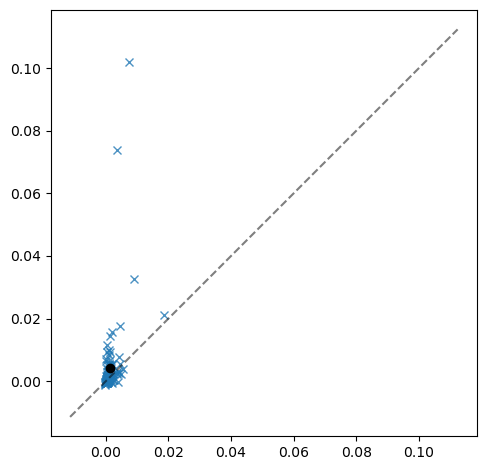

In [225]:
region = "FP_a"
dfthis = df_modtime_wide[df_modtime_wide["region"]==region]
scores_pos, scores_neg = _kernel_compute_scores_pos_and_neg(dfthis, kernel, weights)

fig, ax = plt.subplots()
# ax.plot(scores_pos, scores_neg, 'xk')
from pythonlib.tools.plottools import plotScatter45
plotScatter45(scores_pos, scores_neg, ax=ax, means=True)


In [232]:
import pingouin as pg
kernel = ('stroke-first',
  'stroke-middle',
  'stroke-last',
  '00_fix_touch',
  '05_doneb')
weights = dict_kernels[kernel]

res = []
for region in df_modtime_wide["region"].unique().tolist():
#     region = "FP_p"
    dfthis = df_modtime_wide[df_modtime_wide["region"]==region]
    scores_pos, scores_neg = _kernel_compute_scores_pos_and_neg(dfthis, kernel, weights)
    
    if False:
        fig, ax = plt.subplots()
        # ax.plot(scores_pos, scores_neg, 'xk')
        from pythonlib.tools.plottools import plotScatter45
        plotScatter45(scores_pos, scores_neg, ax=ax, means=True)
    
    
    # linear regression    
    stats = pg.linear_regression(scores_pos, scores_neg, add_intercept=False)
    res.append({
        "region":region,
        "stats":stats
    })
    
    

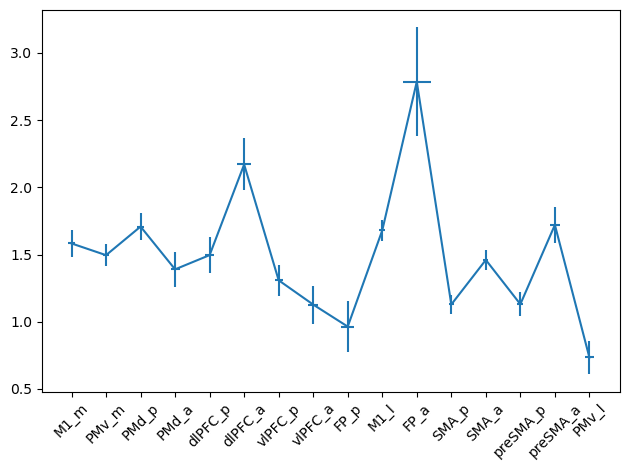

In [233]:
list_coef = [r["stats"].coef.item() for r in res]
list_se = [r["stats"].se.item() for r in res]
list_region = [r["region"] for r in res]

fig, ax = plt.subplots()
ax.errorbar(x = range(len(list_region)), y=list_coef, xerr=list_se, yerr=list_se)
# ax.bar(range(len(list_region)), list_coef, xerr=list_se, yerr=list_se)
ax.set_xticks(range(len(list_region)), list_region);
from pythonlib.tools.plottools import rotate_x_labels
rotate_x_labels(ax, 45)


##### Debug single day


In [ ]:
# Plot heatmap of scores, ordering brain areas by eye/hand... IN PROGRESS
from neuralmonkey.neuralplots.brainschematic import regions_get_ordered_by_x
list_col1 = regions_get_ordered_by_x()
print(list_col1)

In [ ]:
list_col2 = [
    
]

In [ ]:
norm_method = "row_sub"
val_name = "r2_time_minusmean"

# 1) Plot summary (mean over sites)
fig, ax = plt.subplots(1,1, figsize=(8,8))
convert_to_2d_dataframe(df_modtime, col1="region", col2="event_var_level", plot_heatmap=True, 
                        agg_method="mean", val_name=val_name, annotate_heatmap=False, ax=ax, 
                       norm_method=norm_method, dosort_colnames =False,list_cat_1=list_col1);

assert False

In [ ]:
from neuralmonkey.analyses.event_temporal_modulation import kernel_compute, _kernel_compute_scores
df_kernels, df_modtime_wide, df_modtime_wide_normrowsubtr, dict_kernels = kernel_compute(df_modtime)

In [ ]:
response='r2_time_minusmean'
from pythonlib.tools.plottools import plotScatterXreduced, plotScatterOverlay
overlay_mean = False

In [ ]:
sdirthis

#### SMOOTHED FR, ALIGNED TO EACH EVENT, FOR EACH UNIT

In [ ]:
sdir = f"{SAVEDIR}/smfr_relative_strokes"
os.makedirs(sdir, exist_ok=True)


SP_stroke.plot_smfr_average_each_level(13, list_var=["stroke_index_semantic"])


SP_stroke.plot_rasters_smfr_each_level_combined(500, "epoch");

if False:
    import random
    site = random.sample(SP.Sites, 1)[0]
    SP.plot_smfr_average_each_level(site, list_var=["ind_taskstroke_orig"], list_events_uniqnames=["00_stroke"])
    sn.sitegetter_summarytext(site)

##### Plot as heat map, showing all the units

In [ ]:
# DS.timing_extract_basic()
# DS.Dat

In [ ]:
fig, ax = plt.subplots()
ax.hist(DS.Dat["time_duration"], 20)

##### Plot, Heat map of (unit vs event), for each brain region

In [7]:
sn = MS.SessionsList[0]
import random

In [ ]:
# Plot example sites
SP_trial.plot_smfr_average_each_level(chan=6, list_var=["stroke_index"])

In [ ]:
site = 451
trial = 100
fig, ax = plt.subplots(1,1, figsize=(15,2))
sn.plotwrapper_smoothed_multtrials_multsites([site], [trial], ax=ax)
sn.plot_raster_trials(ax, [trial], site, overlay_trial_events=False)

##### Example rasters

In [123]:
# List the exmaples (Wang lab meeting 3/22/23)
# for 10/20/23, sess 0
SAVEDIR

'/gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/RELOADED_DF_MODTIME'

In [128]:
sn = MS.SessionsList[session]

SAVEDIR
sdir = f"{SAVEDIR}/example_rasters_smfr"
os.makedirs(sdir, exist_ok=True)
print(sdir)

/gorilla1/analyses/recordings/main/events_modulation/Pancho-221020-sess_0/example_rasters_smfr


Trying to reextract (trial, event): 59 seqon
Trying to reextract (trial, event): 70 seqon
Trying to reextract (trial, event): 177 seqon
Trying to reextract (trial, event): 240 seqon
Trying to reextract (trial, event): 247 seqon
Trying to reextract (trial, event): 271 seqon
Trying to reextract (trial, event): 292 seqon
Trying to reextract (trial, event): 304 seqon
Trying to reextract (trial, event): 316 seqon
Trying to reextract (trial, event): 332 seqon
Trying to reextract (trial, event): 362 seqon
Trying to reextract (trial, event): 362 reward_all
Trying to reextract (trial, event): 365 seqon
Trying to reextract (trial, event): 405 seqon
Trying to reextract (trial, event): 427 seqon
Trying to reextract (trial, event): 442 seqon
Trying to reextract (trial, event): 474 seqon
Trying to reextract (trial, event): 474 reward_all
Trying to reextract (trial, event): 504 seqon
Trying to reextract (trial, event): 554 seqon


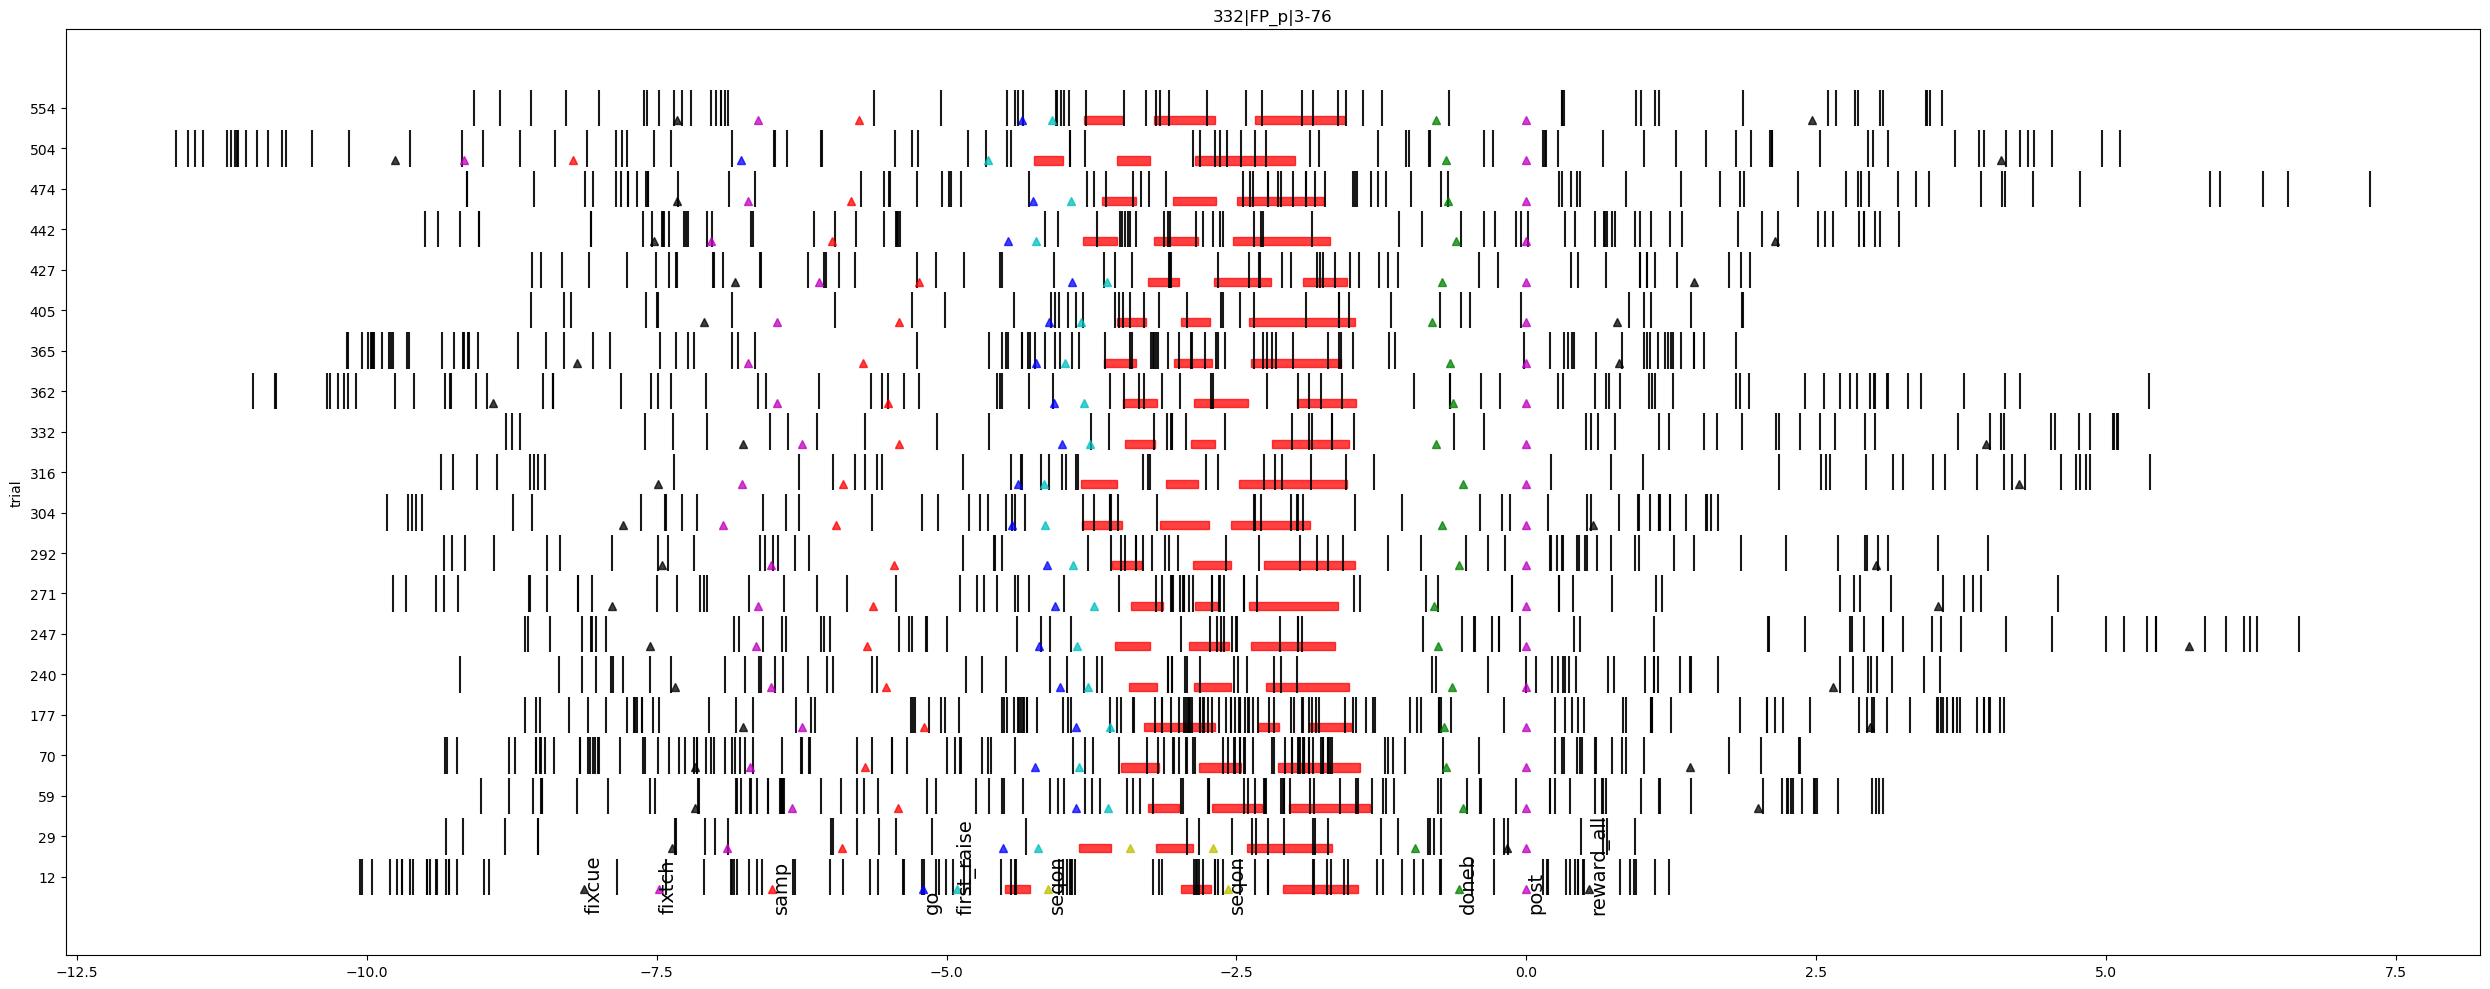

In [115]:
# Plot a single raster
site = 332
alignto = "post"
sn.plotwrapper_raster_multrials_onesite(trials, site=site, alignto=alignto, plot_beh=False);


In [121]:
sdir

'/gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/RELOADED_DF_MODTIME/example_rasters_smfr'

In [127]:
sdir

'/gorilla1/analyses/recordings/main/events_modulation/Pancho-221107-sess_0/RELOADED_DF_MODTIME/example_rasters_smfr'

get_trials_list - only_if_in_dataset
Trying to reextract (trial, event): 61 seqon
Trying to reextract (trial, event): 62 seqon
Trying to reextract (trial, event): 62 doneb
Trying to reextract (trial, event): 62 reward_all
Trying to reextract (trial, event): 159 seqon
Trying to reextract (trial, event): 173 seqon
Trying to reextract (trial, event): 192 seqon
Trying to reextract (trial, event): 192 doneb
Trying to reextract (trial, event): 192 reward_all
Trying to reextract (trial, event): 205 seqon
Trying to reextract (trial, event): 267 seqon
Trying to reextract (trial, event): 289 seqon
Trying to reextract (trial, event): 325 seqon
Trying to reextract (trial, event): 325 doneb
Trying to reextract (trial, event): 325 reward_all
Trying to reextract (trial, event): 338 seqon
Trying to reextract (trial, event): 351 seqon
Trying to reextract (trial, event): 404 seqon
Trying to reextract (trial, event): 416 seqon
Trying to reextract (trial, event): 416 doneb
Trying to reextract (trial, even

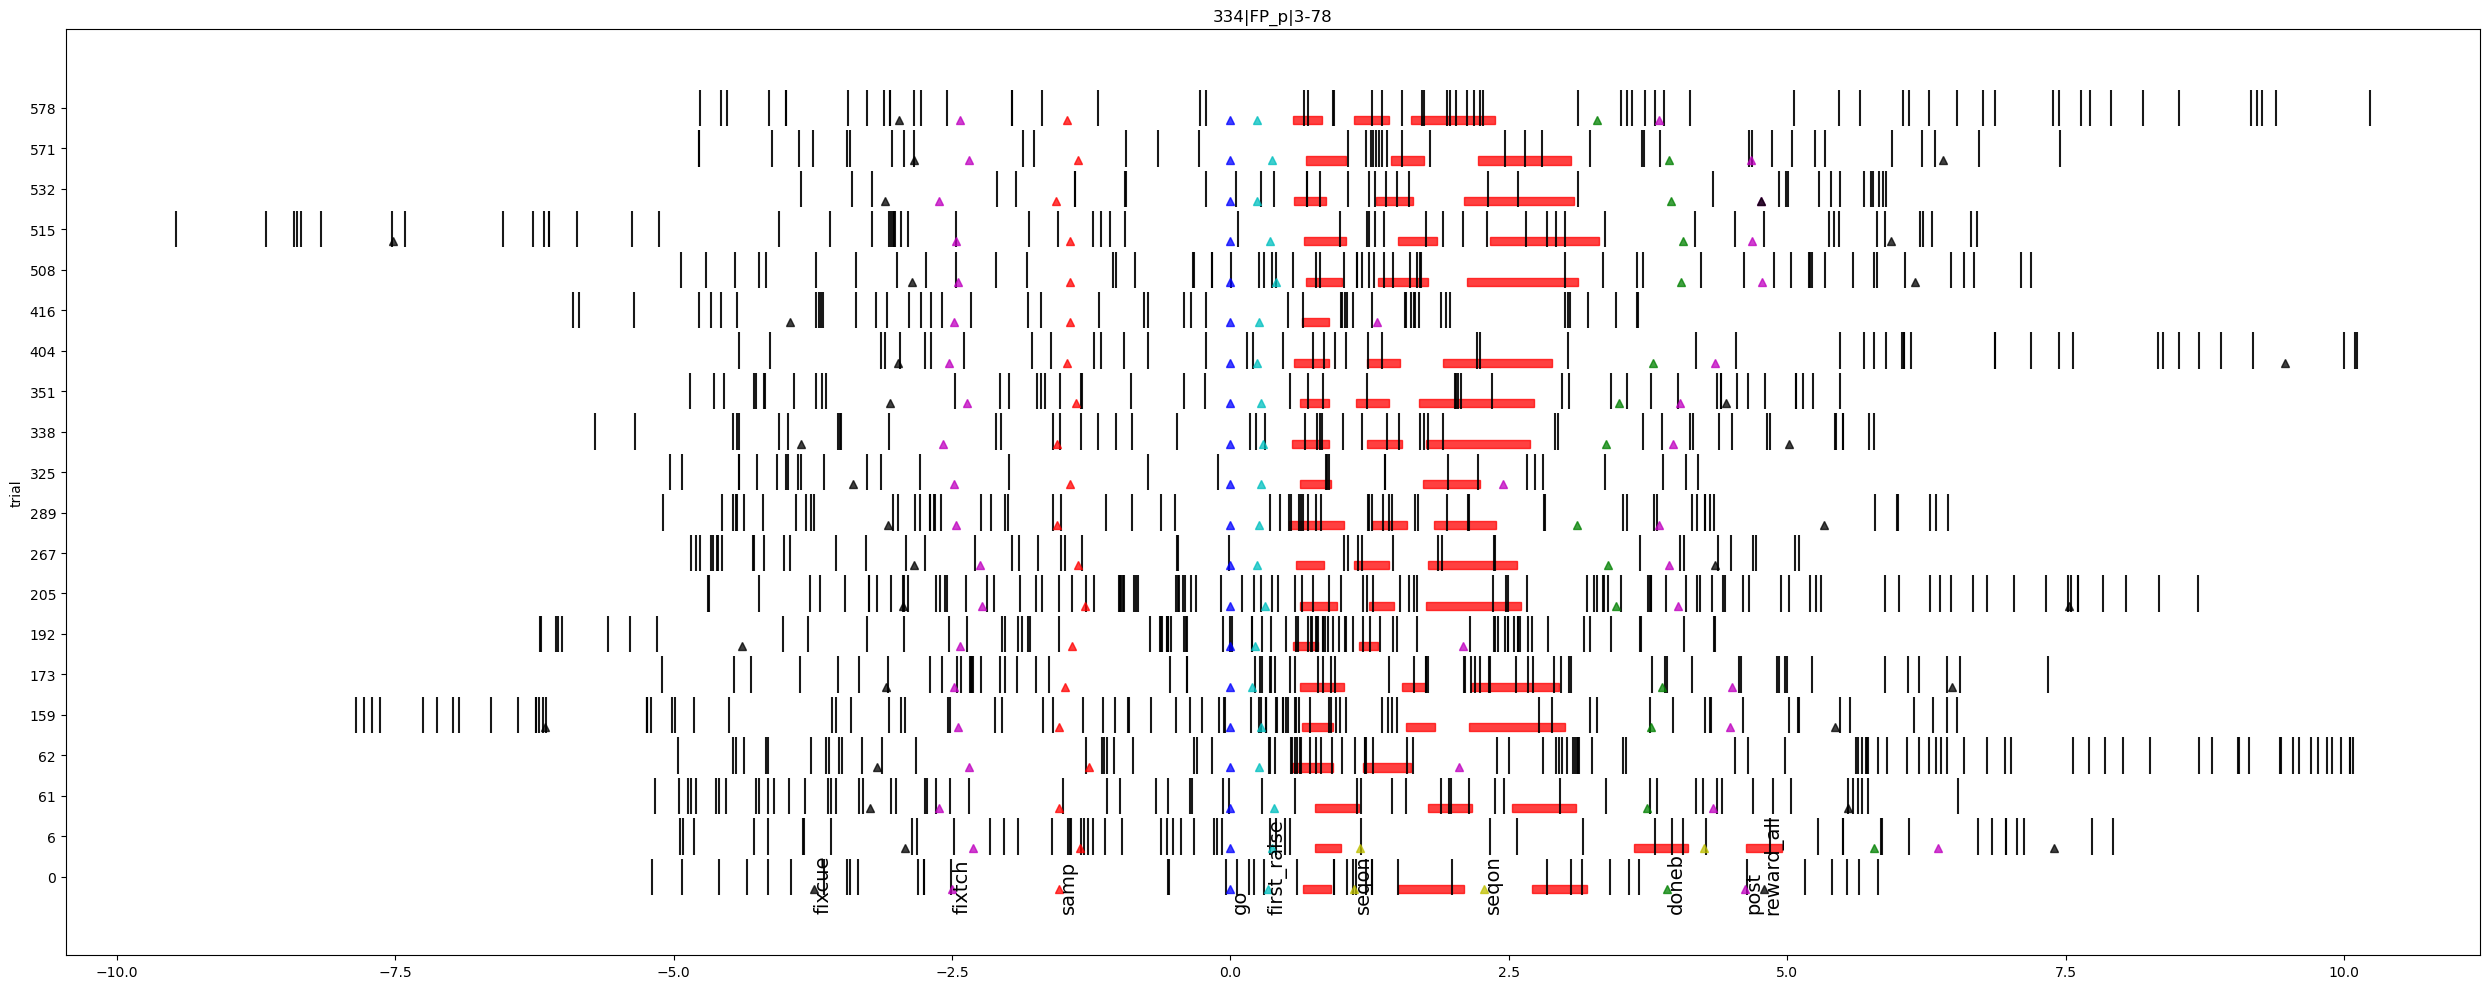

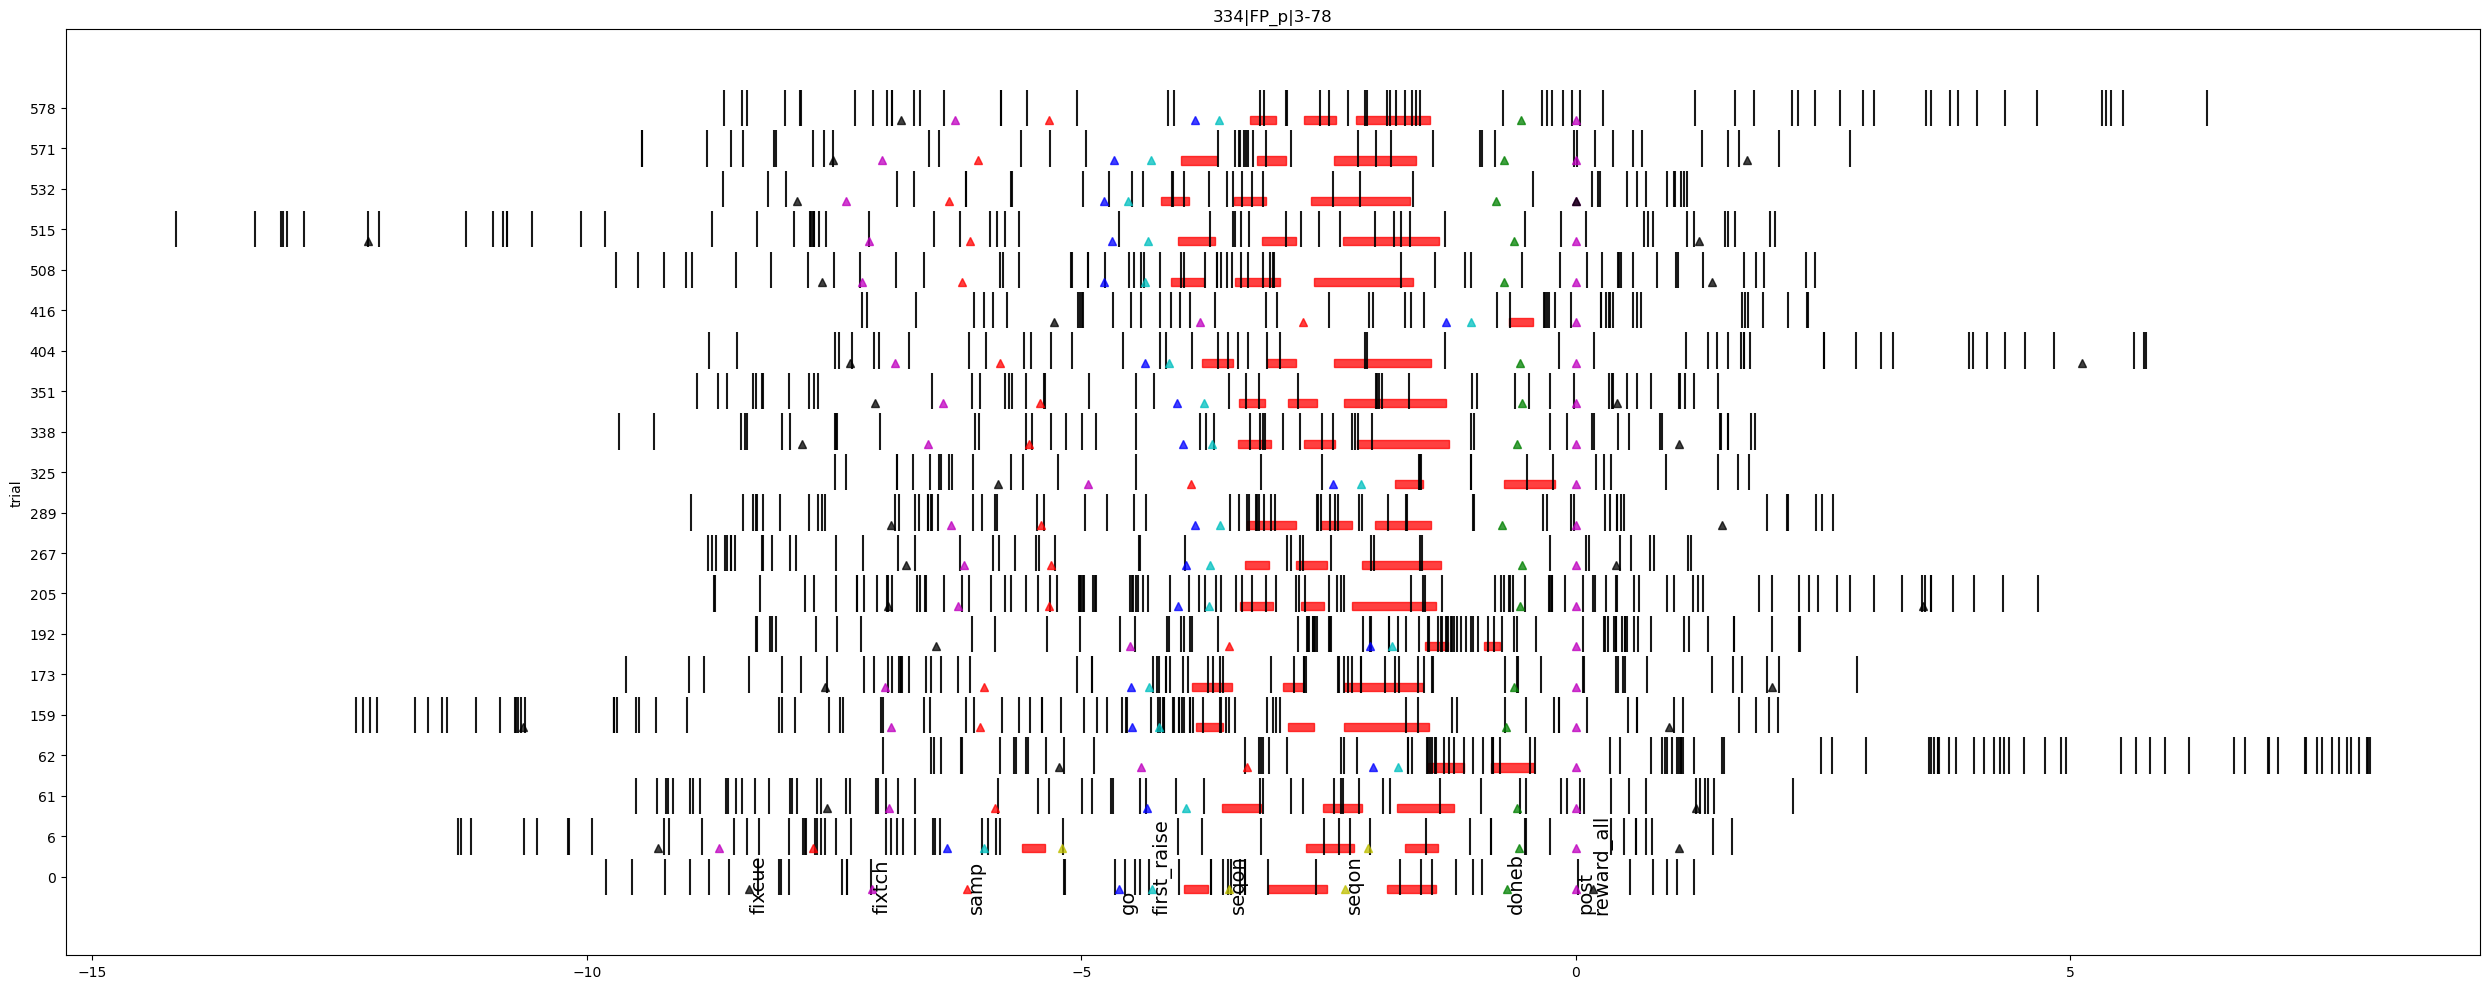

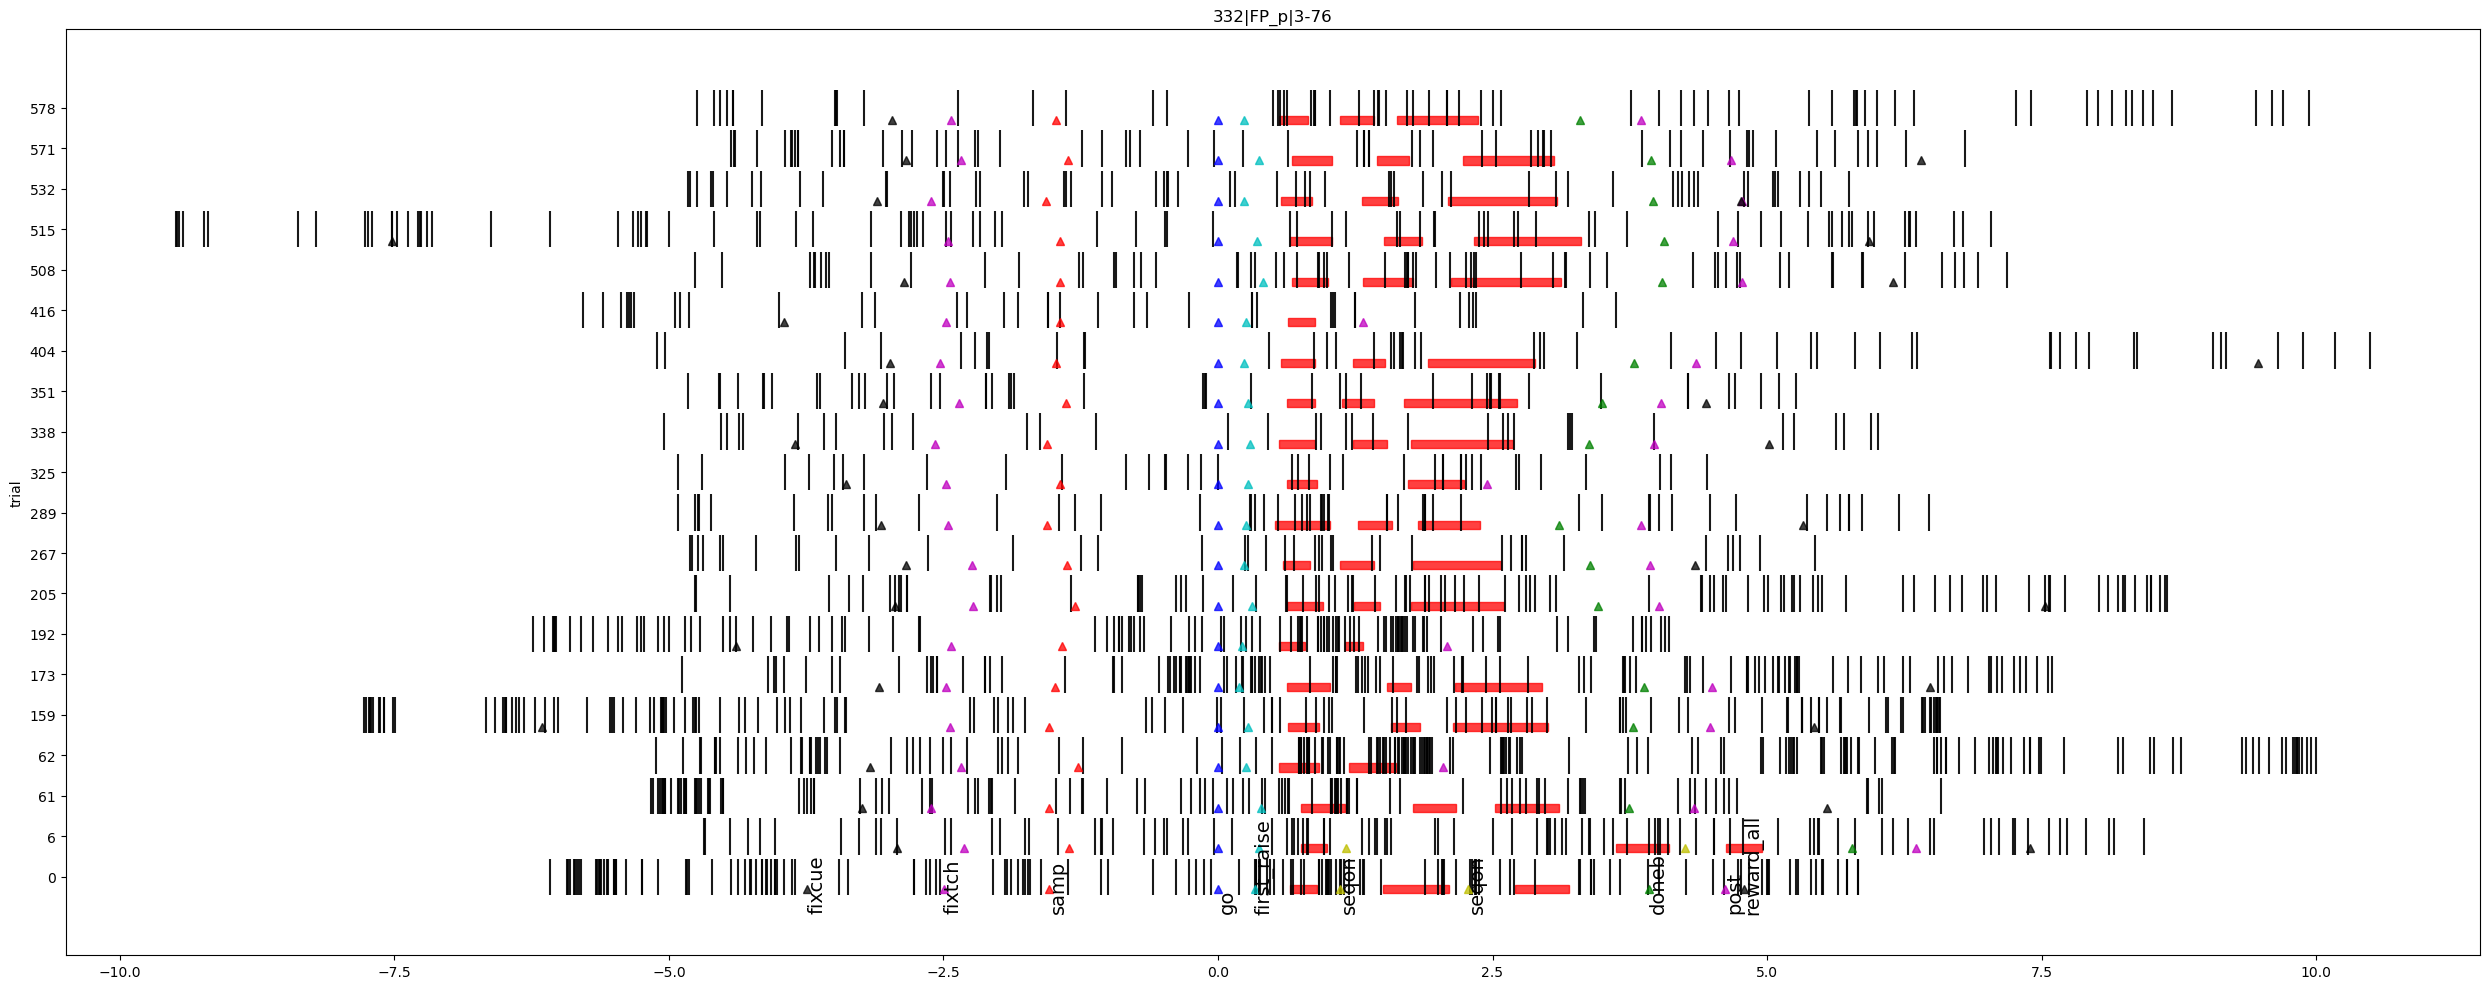

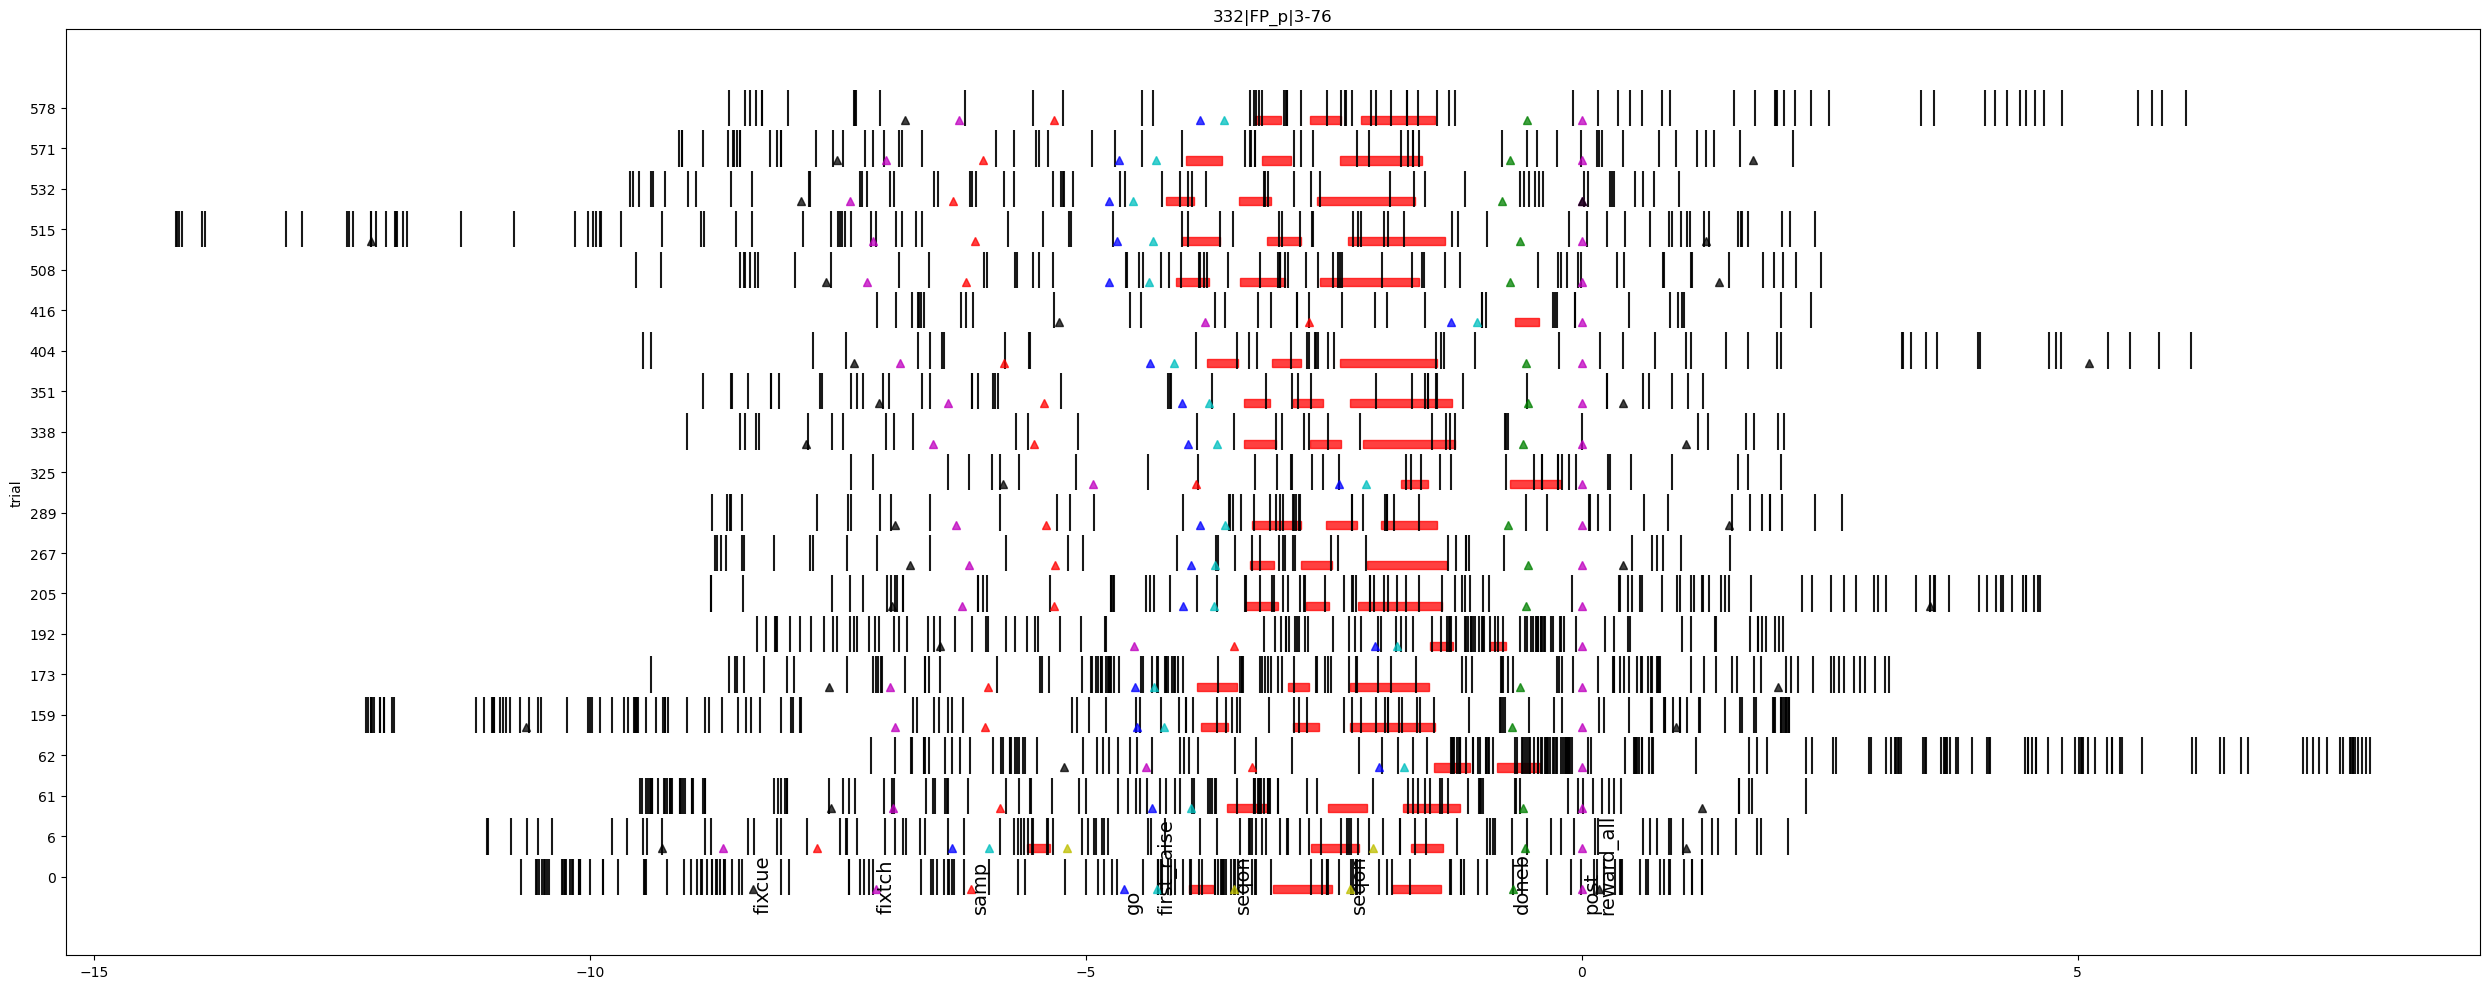

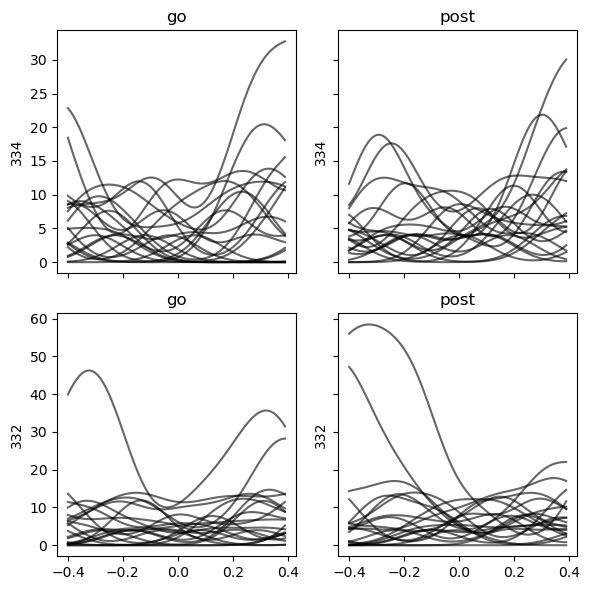

In [129]:
## Visual vs. motor
# list_site = [302, 307, 441, 31]
# list_alignto = ["samp", "first_raise"]

# stroke vs. other movement
# list_site = [451, 469, 465, 53, 57, 97]
# list_alignto = ["fix_touch", "on_strokeidx_0", "doneb"]

# FP (go cue and post)
list_site = [334, 332]
list_alignto = ["go", "post"]

# alignto = "samp"
# alignto = "first_raise"
# alignto = "on_strokeidx_0"

###########
trials = sn.get_trials_list(True, True, True, events_that_must_include=[alignto])
trials = sorted(random.sample(trials, 20))

# 1) Plot rasters
for site in list_site:
    for alignto in list_alignto:        
        fig, axes, fig_draw, axes_draw = sn.plotwrapper_raster_multrials_onesite(trials, site=site, alignto=alignto, plot_beh=False);
        fig.savefig(f"{sdir}/raster_site_{site}-alignto_{alignto}-multtrials.pdf")

# 2) Plot smoothed fr
fig, axes = plt.subplots(len(list_site), len(list_alignto), sharex=True, sharey="row",
                        figsize=(len(list_alignto)*3, len(list_site)*3))
for i, site in enumerate(list_site):
    for j, alignto in enumerate(list_alignto):
            
        ax = axes[i][j]
        sn.plotwrapper_smoothed_multtrials_multsites_timewindow([site], trials, alignto=alignto, pre_dur=-0.4, 
                                                                post_dur=0.4, ax=ax)
        ax.set_title(alignto)
        ax.set_ylabel(site)
        
fig.savefig(f"{sdir}/smfr-site_{list_site[0]}_to_{list_site[-1]}.pdf")
        

In [ ]:
_cal

## Metric to quantify modulation relative to events

In [ ]:
def _extract_frmat_chan_event(SPthis, chan, event, var=None, var_level=None):
    """ 
    Extract frmat, stacking all instances of this event.
    Can optionally keep only this level for this var
    """
    assert False, "use SP.dataextract_as_frmat"
    assert (var_level==None) == (var==None)
    
    if var_level is not None:
        dfthis = SPthis.DfScalar[(SPthis.DfScalar["chan"]==chan) & (SPthis.DfScalar["event_aligned"]==event) & (SPthis.DfScalar[var]==var_level)]   
    else:
        dfthis = SPthis.DfScalar[(SPthis.DfScalar["chan"]==chan) & (SPthis.DfScalar["event_aligned"]==event)]    
        
    frmat = np.concatenate(dfthis["fr_sm"].tolist(), axis=0)    
    
    return frmat 


In [ ]:
site = 79
alignto = "01_go"
event="go"
frmat = _extract_frmat_chan_event(site, alignto)

In [ ]:
# Plot overlay of multiple trials smoothed fr
fig, ax = plt.subplots(1,1, figsize=(5,2))
trials = SP.Trials[:25]
pre_dur=-0.8
post_dur=0.8
sn.plotwrapper_smoothed_multtrials_multsites_timewindow([site], trials, event, pre_dur, post_dur, ax=ax, 
                                                        plot_summary=True)

In [ ]:
sdir = f"{SAVEDIR}/smfr_relative_strokes"
    os.makedirs(sdir, exist_ok=True)

    SP_stroke.plot_smfr_average_each_level(13, list_var=["stroke_index_semantic"])


    SP_stroke.plot_rasters_smfr_each_level_combined(500, "epoch");

##### Plots of modulation

In [ ]:
dfthis = df_modtime

In [ ]:
from pythonlib.tools.snstools import rotateLabel
fig = sns.catplot(data=dfthis, x="event", y="r2_time", hue="region", kind="point", ci=68)
rotateLabel(fig)

In [ ]:
fig = sns.catplot(data=dfthis, x="event", y="r2_time", hue="region", kind="bar")


In [ ]:
fig = sns.catplot(data=dfthis, x="event", col="region", col_wrap=3, y="r2_time_zscored", kind="point", ci=68)
# fig = sns.catplot(data=dfthis, x="event", col="region", col_wrap=3, y="r2_time_zscored")
rotateLabel(fig)

In [ ]:
# DEBUGGING

Mscal.modulationbytime_calc_this(57)

from neuralmonkey.metrics.scalar import _calc_modulation_by_frsm_event_aligned_time



frmat = Mscal.dataextract_as_frmat(57, "stroke-first")
print(frmat.shape)
r2 = _calc_modulation_by_frsm_event_aligned_time(frmat)
print(r2)
fig, ax = plt.subplots(1,1)
ax.plot(frmat.T);

frmat = Mscal.dataextract_as_frmat(57, "stroke-last")
print(frmat.shape)
r2 = _calc_modulation_by_frsm_event_aligned_time(frmat)
print(r2)
fig, ax = plt.subplots(1,1)
ax.plot(frmat.T);

In [ ]:
# fig = sns.catplot(data=dfthis, x="region", col="event", col_wrap=3, y="r2_time", kind="point", ci=68)
fig = sns.catplot(data=dfthis, x="region", hue="event", y="r2_time", kind="point", ci=68, aspect=2)
rotateLabel(fig)